Coisas pra fazer em ordem de importância:
1. Cross validation para saber se random forest esta dando overffiting
2.   tuning de hyperparametros
3.   tuning de hyperparametros + SMOTE
4.   fazer emsembles

Coisas que podemos fazer se der tempo e tiver paciência:
1.   feature selection (tentativa feita e fracassada)
2.   feature engineering
3.   exploratory data analysis robusto

#Importing libraries and analysis

In [1]:
# Importing libraries
import warnings
warnings.filterwarnings('ignore')

#basic libraries
import io
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
!pip install scikit-plot
import scikitplot as skplt
import plotly.express as px

#dataset splitting
from sklearn.model_selection import train_test_split

#decompositions
!pip install umap-learn
import umap
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

#modelos
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import IsolationForest
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB

#hyperparamter tuning
!pip install parameter-sherpa
import sherpa
import sherpa.algorithms.bayesian_optimization as bayesian_optimization

#metricas
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, precision_recall_fscore_support
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, roc_auc_score

#cross_validation
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold, cross_validate

#emsembles
from sklearn.ensemble import StackingClassifier

#balancing
!pip install imbalanced-learn
!pip install imblearn
import imblearn
print(imblearn.__version__)
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks
from collections import Counter

#feature_selection
from sklearn.feature_selection import VarianceThreshold

%matplotlib inline

0.8.1


In [2]:
bank_data = pd.read_csv('data.csv')
bank_data.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),...,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,0.780985,1.256969e-04,0.0,0.458143,0.000725,0.0,0.147950,0.147950,0.147950,0.169141,0.311664,0.017560,0.095921,0.138736,0.022102,0.848195,0.688979,0.688979,0.217535,4.980000e+09,0.000327,0.263100,0.363725,0.002259,0.001208,0.629951,0.021266,0.207576,0.792424,0.005024,...,0.190643,0.004094,0.001997,1.473360e-04,0.147308,0.334015,0.276920,0.001036,0.676269,0.721275,0.339077,0.025592,0.903225,0.002022,0.064856,7.010000e+08,6.550000e+09,0.593831,4.580000e+08,0.671568,0.424206,0.676269,0.339077,0.126549,0.637555,0.458609,0.520382,0.312905,0.118250,0,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,0.781506,2.897851e-04,0.0,0.461867,0.000647,0.0,0.182251,0.182251,0.182251,0.208944,0.318137,0.021144,0.093722,0.169918,0.022080,0.848088,0.689693,0.689702,0.217620,6.110000e+09,0.000443,0.264516,0.376709,0.006016,0.004039,0.635172,0.012502,0.171176,0.828824,0.005059,...,0.182419,0.014948,0.004136,1.383910e-03,0.056963,0.341106,0.289642,0.005210,0.308589,0.731975,0.329740,0.023947,0.931065,0.002226,0.025516,1.065198e-04,7.700000e+09,0.593916,2.490000e+09,0.671570,0.468828,0.308589,0.329740,0.120916,0.641100,0.459001,0.567101,0.314163,0.047775,0,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,0.780284,2.361297e-04,25500000.0,0.458521,0.000790,0.0,0.177911,0.177911,0.193713,0.180581,0.307102,0.005944,0.092338,0.142803,0.022760,0.848094,0.689463,0.689470,0.217601,7.280000e+09,0.000396,0.264184,0.368913,0.011543,0.005348,0.629631,0.021248,0.207516,0.792484,0.005100,..

In [3]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

In [4]:
bank_data.describe()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),...,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,...,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.0,6819.000000
mean,0.032263,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,0.781381,1.995347e+09,1.950427e+09,0.467431,1.644801e+07,0.115001,0.190661,0.190633,0.190672,0.228813,0.323482,1.328641e+06,0.109091,0.184361,0.022408,0.847980,0.689146,0.689150,0.217639,5.508097e+09,1.566212e+06,0.264248,0.379677,4.032850e+05,8.376595e+06,0.630991,4.416337e+06,0.113177,0.886823,0.008783,...,0.522273,0.124095,3.592902e+06,3.715999e+07,0.090673,0.353828,0.277395,5.580680e+07,0.761599,0.735817,0.331410,5.416004e+07,0.934733,0.002549,0.029184,1.195856e+09,2.163735e+09,0.594006,2.471977e+09,0.671531,1.220121e+06,0.761599,0.331410,0.115645,0.649731,0.461849,0.593415,0.315582,0.031506,0.001173,0.807760,1.862942e+07,0.623915,0.607946,0.840402,0.280365,0.027541,0.565358,1.0,0.047578
std,0.176710,0.060686

In [5]:
# Checking for duplicates
bank_data.duplicated().sum()

0

In [6]:
print(bank_data['Bankrupt?'].value_counts())

0    6599
1     220
Name: Bankrupt?, dtype: int64


In [7]:
#matriz de correlação (é bem grande, recomendo n rodar)
#fig, ax = plt.subplots(figsize=(75,75))

#sns.heatmap(bank_data.corr(), vmin=-1, vmax=1, cmap=sns.diverging_palette(20, 220, as_cmap=True), annot=True)

#Separação treino/teste

In [8]:
x = bank_data.drop('Bankrupt?', axis=1)
y = bank_data['Bankrupt?']

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [10]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [11]:
x_validation, x_test2, y_validation, y_test2 = train_test_split(x_test2, y_test2, test_size = 0.5, random_state = 0)

#PCA 2d

In [12]:
pca = PCA(n_components=2)
pca.fit(x)
x_pca = pca.transform(x)

In [13]:
# array to dataframe
x_pca = pd.DataFrame(data=x_pca[0:,0:], index=[i for i in range(x_pca.shape[0])], columns=['PC'+str(i) for i in range(x_pca.shape[1])])

In [14]:
# insert Bankrupt colunm back to x
x_pca[' Bankrupt?'] = y

INFO:numexpr.utils:NumExpr defaulting to 2 threads.


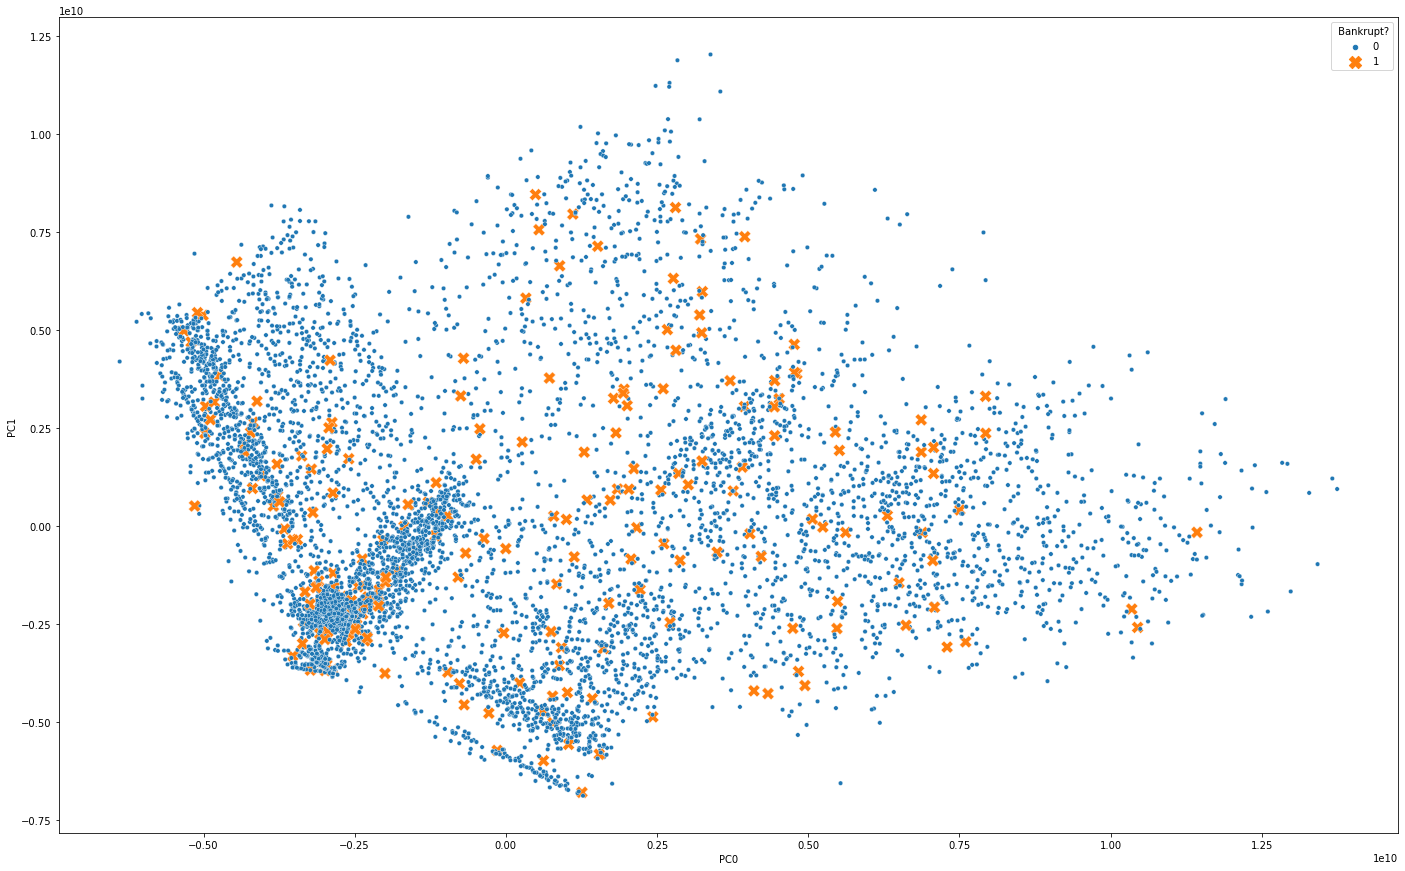

In [15]:
fig, ax = plt.subplots()
fig.set_size_inches(24, 15)
sns.scatterplot(x_pca['PC0'], x_pca['PC1'], hue = ' Bankrupt?', style = ' Bankrupt?', data = x_pca, size=" Bankrupt?", sizes=(150, 20))

#PCA 3d

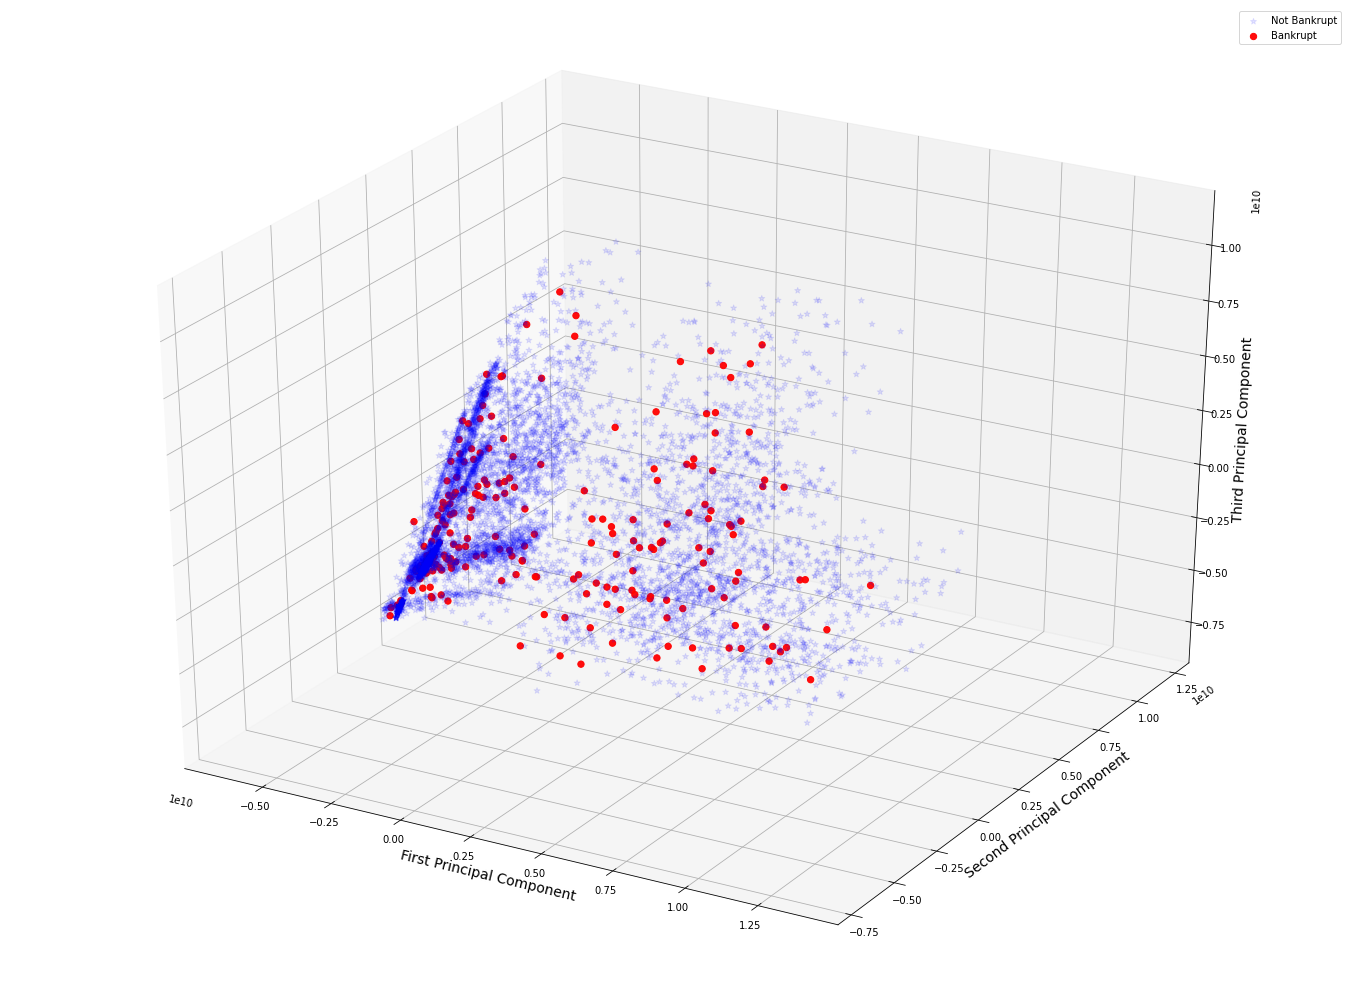

In [16]:
pca = PCA(n_components=3)
pca.fit(x) 
x_pca = pca.transform(x) 

ex_variance=np.var(x_pca,axis=0)
ex_variance_ratio = ex_variance/np.sum(ex_variance)
ex_variance_ratio


Xax = x_pca[:,0]
Yax = x_pca[:,1]
Zax = x_pca[:,2]

cdict = {0:'blue',1:'red'}
labl = {0:'Not Bankrupt',1:'Bankrupt'}
marker = {0:'*',1:'o'}
alpha = {0:.1, 1:.95}

fig = plt.figure(figsize=(24,18))
ax = fig.add_subplot(111, projection='3d')

fig.patch.set_facecolor('white')
for l in np.unique(y):
 ix=np.where(y==l)
 ax.scatter(Xax[ix], Yax[ix], Zax[ix], c=cdict[l], s=40,
           label=labl[l], marker=marker[l], alpha=alpha[l])
# for loop ends
ax.set_xlabel("First Principal Component", fontsize=14)
ax.set_ylabel("Second Principal Component", fontsize=14)
ax.set_zlabel("Third Principal Component", fontsize=14)

ax.legend()
plt.show()

#TSNE 2d

In [17]:
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=2000)
x_tsne = tsne.fit_transform(x)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 6819 samples in 0.002s...
[t-SNE] Computed neighbors for 6819 samples in 1.349s...
[t-SNE] Computed conditional probabilities for sample 1000 / 6819
[t-SNE] Computed conditional probabilities for sample 2000 / 6819
[t-SNE] Computed conditional probabilities for sample 3000 / 6819
[t-SNE] Computed conditional probabilities for sample 4000 / 6819
[t-SNE] Computed conditional probabilities for sample 5000 / 6819
[t-SNE] Computed conditional probabilities for sample 6000 / 6819
[t-SNE] Computed conditional probabilities for sample 6819 / 6819
[t-SNE] Mean sigma: 4.624504
[t-SNE] KL divergence after 250 iterations with early exaggeration: 70.117477
[t-SNE] KL divergence after 2000 iterations: 0.811514


In [18]:
# array to dataframe
x_tsne = pd.DataFrame(data=x_tsne[0:,0:], index=[i for i in range(x_tsne.shape[0])], columns=['TSNE'+str(i) for i in range(x_tsne.shape[1])])

In [19]:
# insert Bankrupt colunm back to x
x_tsne[' Bankrupt?'] = y

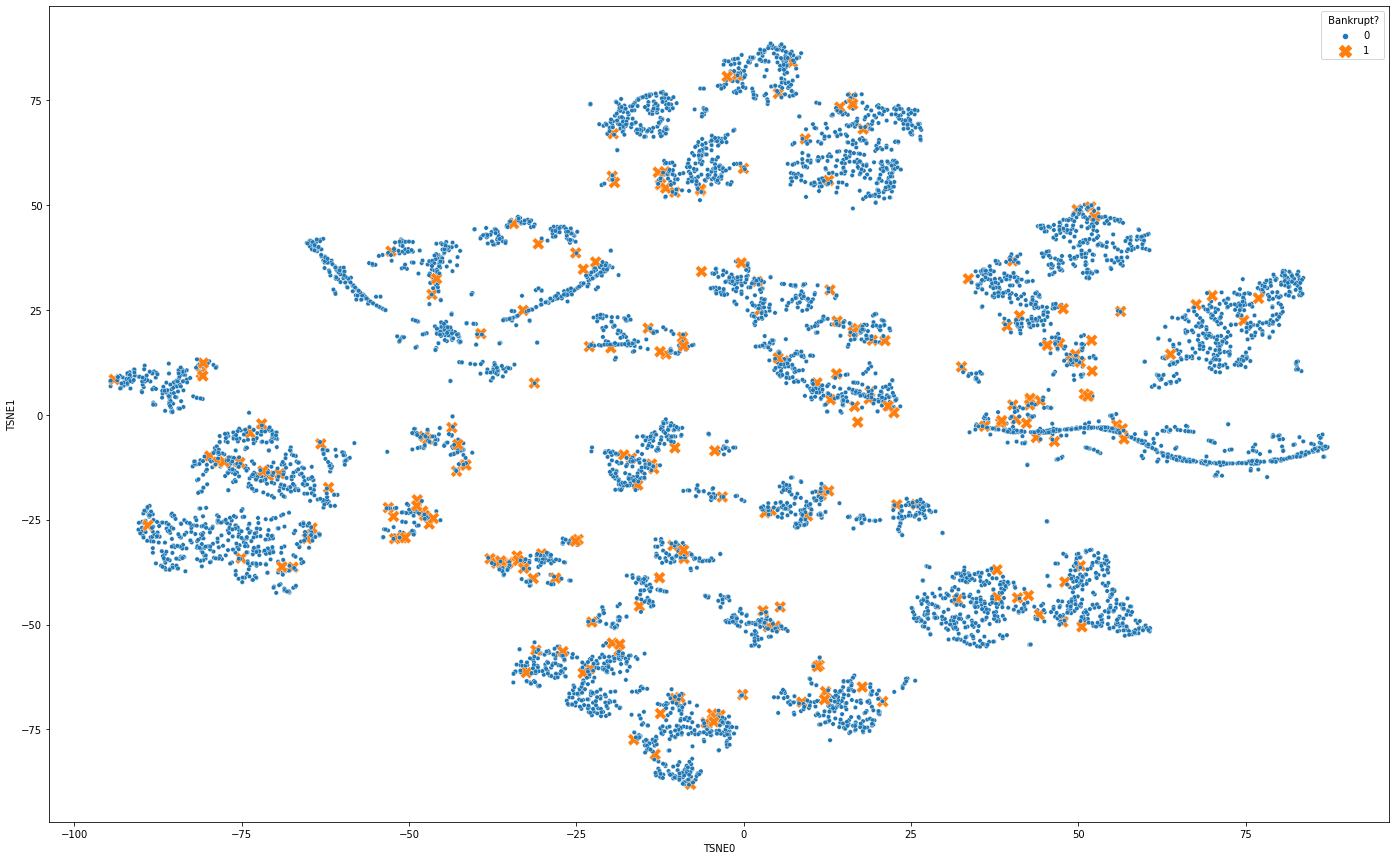

In [20]:
fig, ax = plt.subplots()
fig.set_size_inches(24, 15)
sns.scatterplot(x_tsne['TSNE0'], x_tsne['TSNE1'], hue = ' Bankrupt?', style = ' Bankrupt?', data = x_tsne, size=" Bankrupt?", sizes=(150, 20))

#TSNE 3d

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 6819 samples in 0.001s...
[t-SNE] Computed neighbors for 6819 samples in 1.232s...
[t-SNE] Computed conditional probabilities for sample 1000 / 6819
[t-SNE] Computed conditional probabilities for sample 2000 / 6819
[t-SNE] Computed conditional probabilities for sample 3000 / 6819
[t-SNE] Computed conditional probabilities for sample 4000 / 6819
[t-SNE] Computed conditional probabilities for sample 5000 / 6819
[t-SNE] Computed conditional probabilities for sample 6000 / 6819
[t-SNE] Computed conditional probabilities for sample 6819 / 6819
[t-SNE] Mean sigma: 4.624504
[t-SNE] KL divergence after 250 iterations with early exaggeration: 70.626663
[t-SNE] KL divergence after 2000 iterations: 0.696910


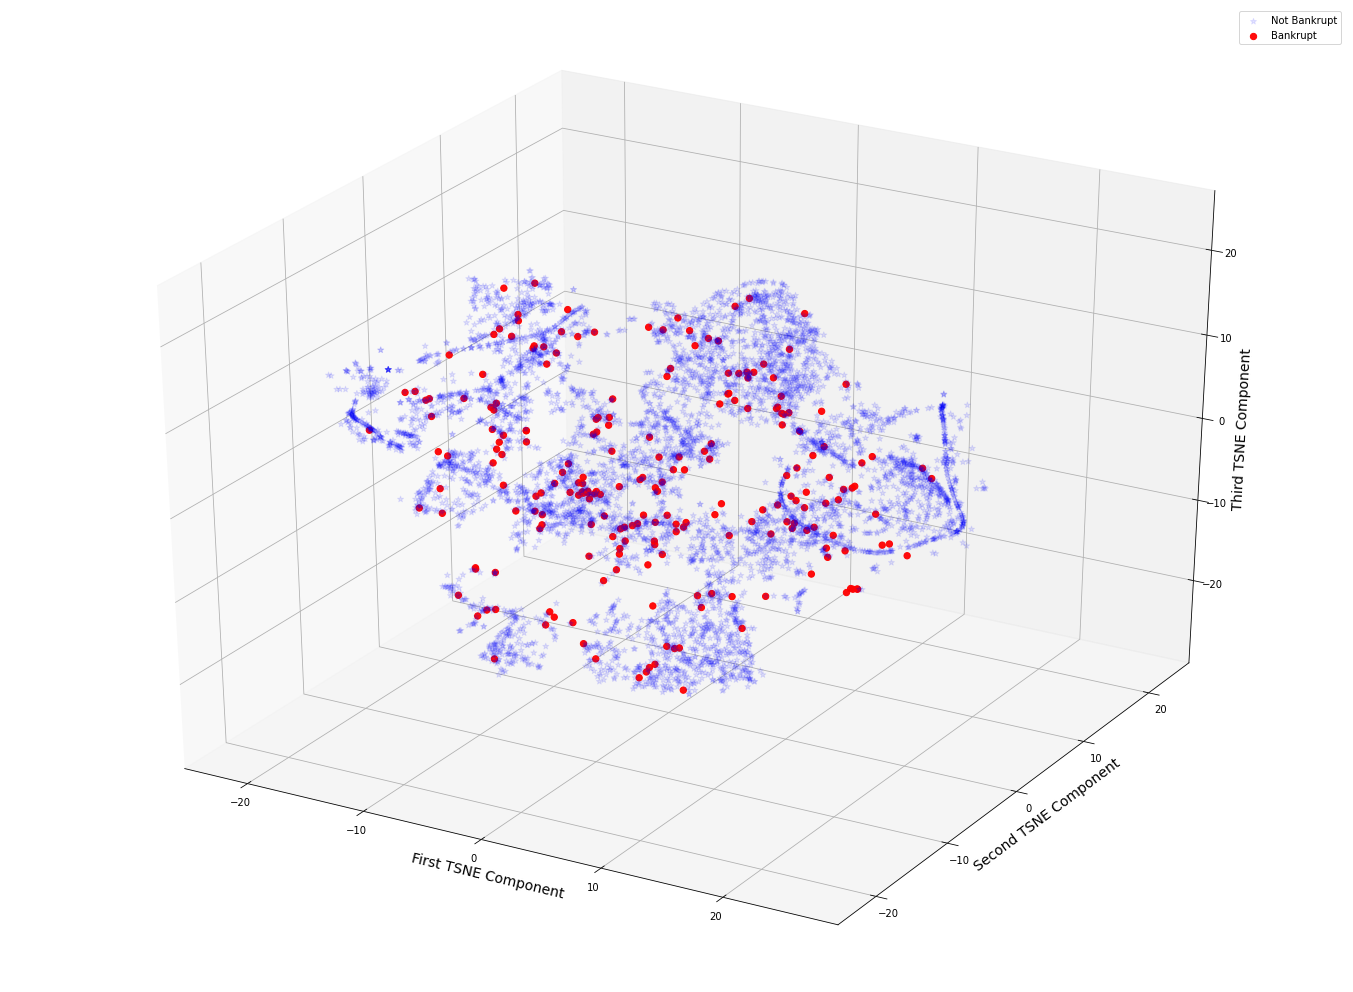

In [21]:
tsne = TSNE(n_components=3, verbose=1, perplexity=40, n_iter=2000)
x_tsne = tsne.fit_transform(x)

ex_variance=np.var(x_tsne,axis=0)
ex_variance_ratio = ex_variance/np.sum(ex_variance)
ex_variance_ratio


Xax = x_tsne[:,0]
Yax = x_tsne[:,1]
Zax = x_tsne[:,2]

cdict = {0:'blue',1:'red'}
labl = {0:'Not Bankrupt',1:'Bankrupt'}
marker = {0:'*',1:'o'}
alpha = {0:.1, 1:.95}

fig = plt.figure(figsize=(24,18))
ax = fig.add_subplot(111, projection='3d')

fig.patch.set_facecolor('white')
for l in np.unique(y):
 ix=np.where(y==l)
 ax.scatter(Xax[ix], Yax[ix], Zax[ix], c=cdict[l], s=40,
           label=labl[l], marker=marker[l], alpha=alpha[l])
# for loop ends
ax.set_xlabel("First TSNE Component", fontsize=14)
ax.set_ylabel("Second TSNE Component", fontsize=14)
ax.set_zlabel("Third TSNE Component", fontsize=14)

ax.legend()
plt.show()

#UMAP 2d

In [22]:
manifold = umap.UMAP().fit(x, y)
x_umap = manifold.transform(x)

In [23]:
# array to dataframe
x_umap = pd.DataFrame(data=x_umap[0:,0:], index=[i for i in range(x_umap.shape[0])], columns=['UMAP'+str(i) for i in range(x_umap.shape[1])])

In [24]:
# insert Bankrupt colunm back to x
x_umap[' Bankrupt?'] = y

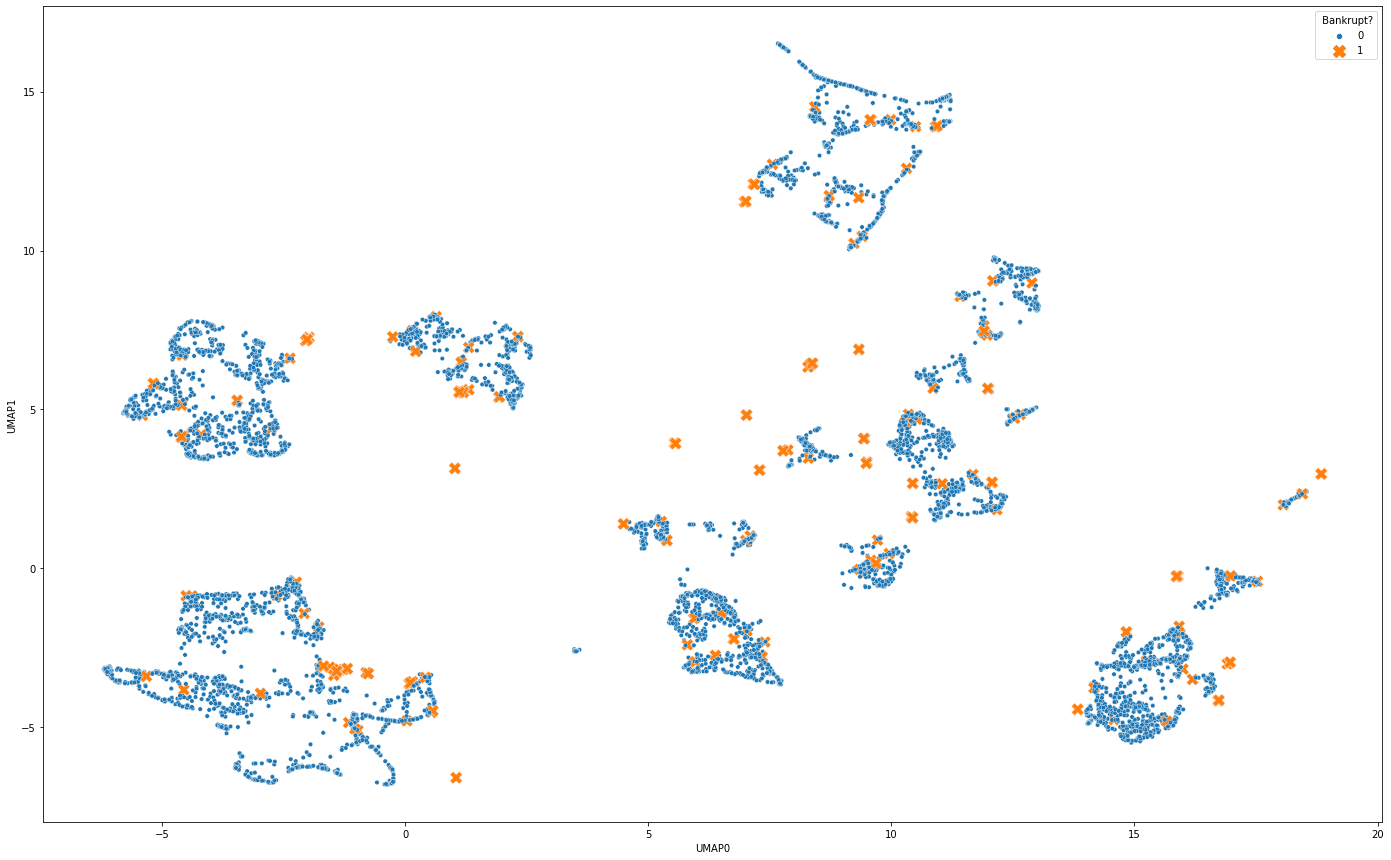

In [25]:
fig, ax = plt.subplots()
fig.set_size_inches(24, 15)
sns.scatterplot(x_umap['UMAP0'], x_umap['UMAP1'], hue = ' Bankrupt?', style = ' Bankrupt?', data = x_umap, size=" Bankrupt?", sizes=(150, 20))

#UMAP 3d

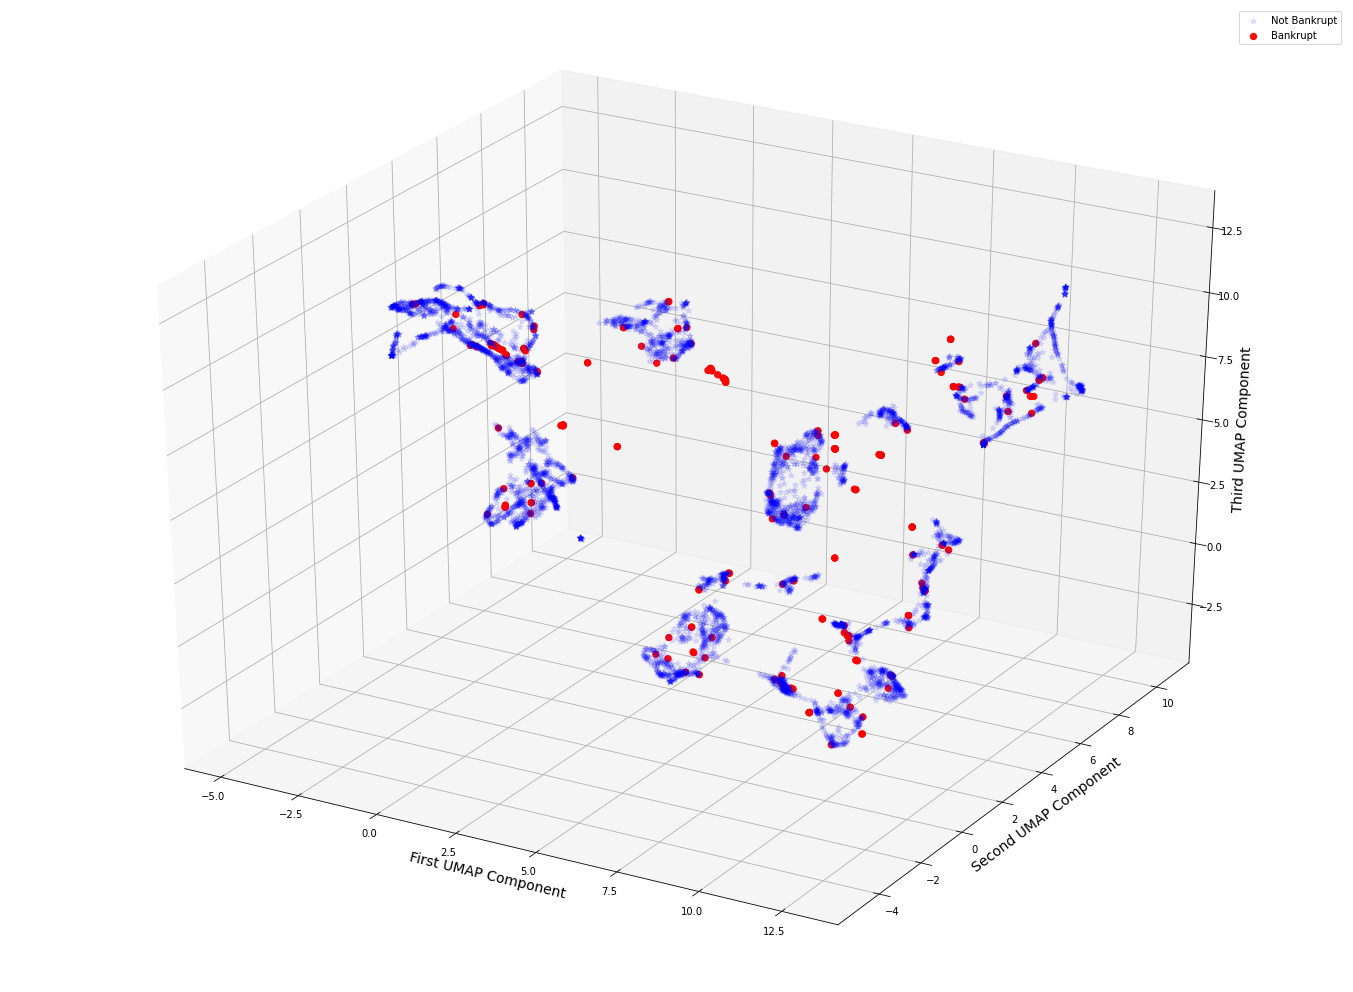

In [26]:
manifold = umap.UMAP(n_components=3).fit(x, y)
x_umap = manifold.transform(x)

ex_variance=np.var(x_umap,axis=0)
ex_variance_ratio = ex_variance/np.sum(ex_variance)
ex_variance_ratio


Xax = x_umap[:,0]
Yax = x_umap[:,1]
Zax = x_umap[:,2]

cdict = {0:'blue',1:'red'}
labl = {0:'Not Bankrupt',1:'Bankrupt'}
marker = {0:'*',1:'o'}
alpha = {0:.1, 1:.95}

fig = plt.figure(figsize=(24,18))
ax = fig.add_subplot(111, projection='3d')

fig.patch.set_facecolor('white')
for l in np.unique(y):
 ix=np.where(y==l)
 ax.scatter(Xax[ix], Yax[ix], Zax[ix], c=cdict[l], s=40,
           label=labl[l], marker=marker[l], alpha=alpha[l])
# for loop ends
ax.set_xlabel("First UMAP Component", fontsize=14)
ax.set_ylabel("Second UMAP Component", fontsize=14)
ax.set_zlabel("Third UMAP Component", fontsize=14)

ax.legend()
plt.show()

#**Para todos (PCA, TSNE e UMAP) utilizar x (x = transform(x)) resulta em scores mais baixos em todos os modelos**

#LogisticRegression

In [12]:
lr = LogisticRegression(random_state=0, max_iter = 100000)

lr.fit(x_train,y_train)
lr_pred_class = lr.predict(x_test)

print(classification_report(y_test, lr_pred_class))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1318
           1       0.00      0.00      0.00        46

    accuracy                           0.95      1364
   macro avg       0.48      0.49      0.49      1364
weighted avg       0.93      0.95      0.94      1364



Text(0, 0.5, 'True Positive Rate')

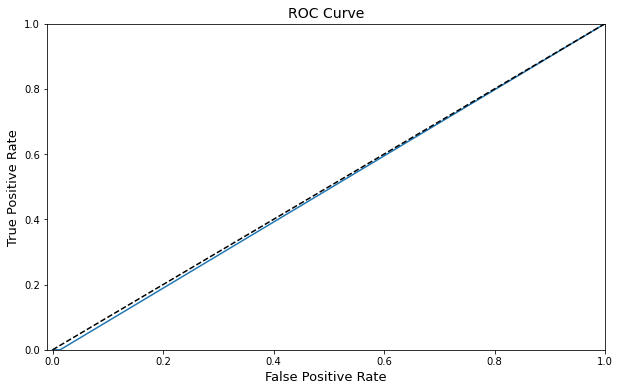

In [13]:
log_fpr, log_tpr, log_thresold = roc_curve(y_test, lr_pred_class)

plt.figure(figsize=(10,6))
plt.plot(log_fpr, log_tpr, label='Logistic Regression Classifier Score: {:.4f}'.format(roc_auc_score(y_test, lr_pred_class)))
plt.plot([0, 1], [0, 1], 'k--')
plt.axis([-0.01, 1, 0, 1])
plt.title('ROC Curve', fontsize=14)
plt.xlabel('False Positive Rate', fontsize=13)
plt.ylabel('True Positive Rate', fontsize=13)

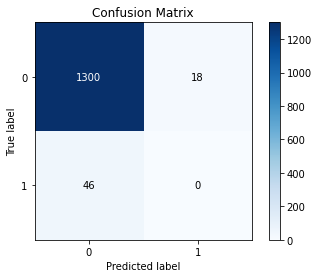

In [14]:
plot = skplt.metrics.plot_confusion_matrix(y_test, lr_pred_class)

#LinearDiscriminantAnalysis

In [15]:
ld = LinearDiscriminantAnalysis()

ld.fit(x_train,y_train)
ld_pred_class = ld.predict(x_test)

print(classification_report(y_test, ld_pred_class))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1318
           1       0.53      0.35      0.42        46

    accuracy                           0.97      1364
   macro avg       0.76      0.67      0.70      1364
weighted avg       0.96      0.97      0.96      1364



Text(0, 0.5, 'True Positive Rate')

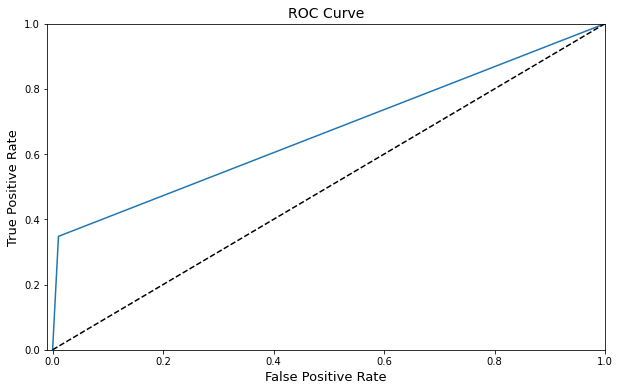

In [16]:
ld_fpr, ld_tpr, ld_thresold = roc_curve(y_test, ld_pred_class)

plt.figure(figsize=(10,6))
plt.plot(ld_fpr, ld_tpr, label='Logistic Regression Classifier Score: {:.4f}'.format(roc_auc_score(y_test, ld_pred_class)))
plt.plot([0, 1], [0, 1], 'k--')
plt.axis([-0.01, 1, 0, 1])
plt.title('ROC Curve', fontsize=14)
plt.xlabel('False Positive Rate', fontsize=13)
plt.ylabel('True Positive Rate', fontsize=13)

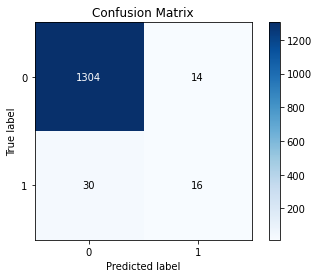

In [17]:
plot = skplt.metrics.plot_confusion_matrix(y_test, ld_pred_class)

#XGBoost

In [18]:
xgb = XGBClassifier()

xgb.fit(x_train,y_train)
xgb_pred_class = xgb.predict(x_test)

print(classification_report(y_test, xgb_pred_class))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1318
           1       0.72      0.28      0.41        46

    accuracy                           0.97      1364
   macro avg       0.85      0.64      0.70      1364
weighted avg       0.97      0.97      0.97      1364



Text(0, 0.5, 'True Positive Rate')

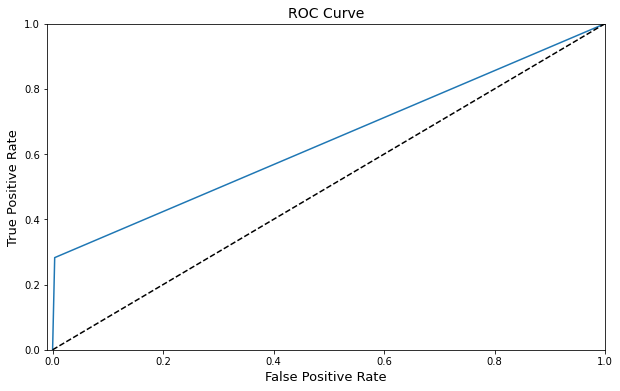

In [19]:
xgb_fpr, xgb_tpr, xgb_thresold = roc_curve(y_test, xgb_pred_class)

plt.figure(figsize=(10,6))
plt.plot(xgb_fpr, xgb_tpr, label='Logistic Regression Classifier Score: {:.4f}'.format(roc_auc_score(y_test, xgb_pred_class)))
plt.plot([0, 1], [0, 1], 'k--')
plt.axis([-0.01, 1, 0, 1])
plt.title('ROC Curve', fontsize=14)
plt.xlabel('False Positive Rate', fontsize=13)
plt.ylabel('True Positive Rate', fontsize=13)

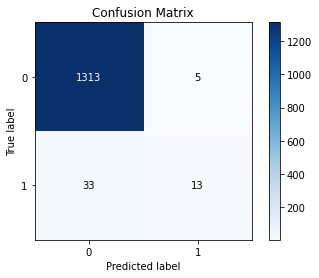

In [20]:
plot = skplt.metrics.plot_confusion_matrix(y_test, xgb_pred_class)

#SVM

In [21]:
svc = SVC(kernel = 'rbf')

svc.fit(x_train,y_train)
svc_pred_class = svc.predict(x_test)

print(classification_report(y_test, svc_pred_class))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1318
           1       0.00      0.00      0.00        46

    accuracy                           0.97      1364
   macro avg       0.48      0.50      0.49      1364
weighted avg       0.93      0.97      0.95      1364



Text(0, 0.5, 'True Positive Rate')

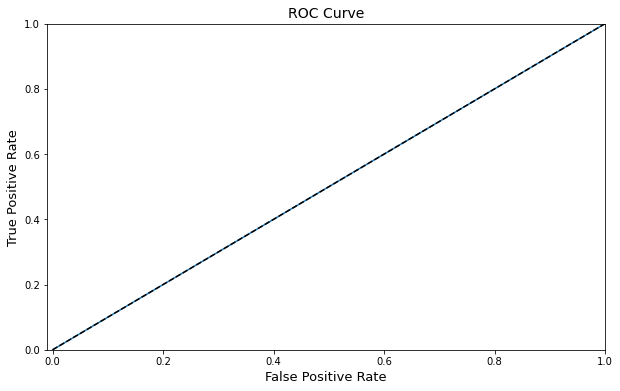

In [22]:
svc_fpr, svc_tpr, svc_thresold = roc_curve(y_test, svc_pred_class)

plt.figure(figsize=(10,6))
plt.plot(svc_fpr, svc_tpr, label='Logistic Regression Classifier Score: {:.4f}'.format(roc_auc_score(y_test, svc_pred_class)))
plt.plot([0, 1], [0, 1], 'k--')
plt.axis([-0.01, 1, 0, 1])
plt.title('ROC Curve', fontsize=14)
plt.xlabel('False Positive Rate', fontsize=13)
plt.ylabel('True Positive Rate', fontsize=13)

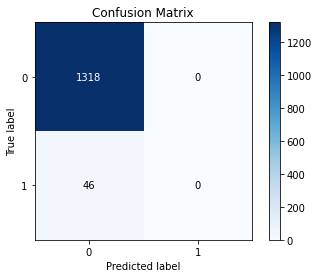

In [23]:
plot = skplt.metrics.plot_confusion_matrix(y_test, svc_pred_class)

#Random Forest

In [24]:
rf = RandomForestClassifier()

rf.fit(x_train, y_train)
rf_pred_class = rf.predict(x_test)

print(classification_report(y_test, rf_pred_class))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1318
           1       0.60      0.20      0.30        46

    accuracy                           0.97      1364
   macro avg       0.79      0.60      0.64      1364
weighted avg       0.96      0.97      0.96      1364



Text(0, 0.5, 'True Positive Rate')

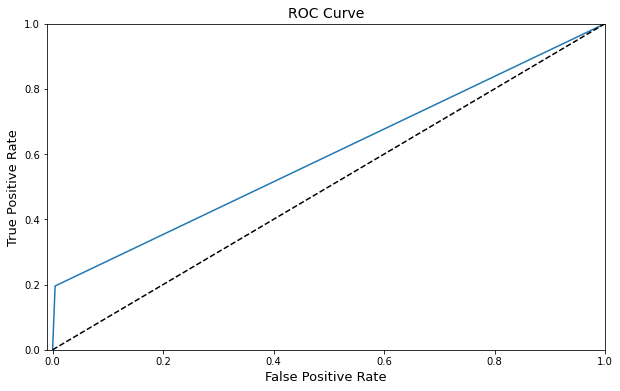

In [25]:
rf_fpr, rf_tpr, rf_thresold = roc_curve(y_test, rf_pred_class)

plt.figure(figsize=(10,6))
plt.plot(rf_fpr, rf_tpr, label='Logistic Regression Classifier Score: {:.4f}'.format(roc_auc_score(y_test, rf_pred_class)))
plt.plot([0, 1], [0, 1], 'k--')
plt.axis([-0.01, 1, 0, 1])
plt.title('ROC Curve', fontsize=14)
plt.xlabel('False Positive Rate', fontsize=13)
plt.ylabel('True Positive Rate', fontsize=13)

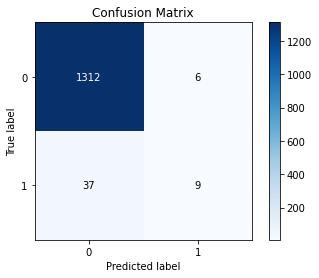

In [26]:
plot = skplt.metrics.plot_confusion_matrix(y_test, rf_pred_class)

#KNN

In [27]:
knn = KNeighborsClassifier(n_neighbors = 5)

knn.fit(x_train, y_train)
knn_pred_class = knn.predict(x_test)

print(classification_report(y_test, knn_pred_class))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1318
           1       0.00      0.00      0.00        46

    accuracy                           0.97      1364
   macro avg       0.48      0.50      0.49      1364
weighted avg       0.93      0.97      0.95      1364



Text(0, 0.5, 'True Positive Rate')

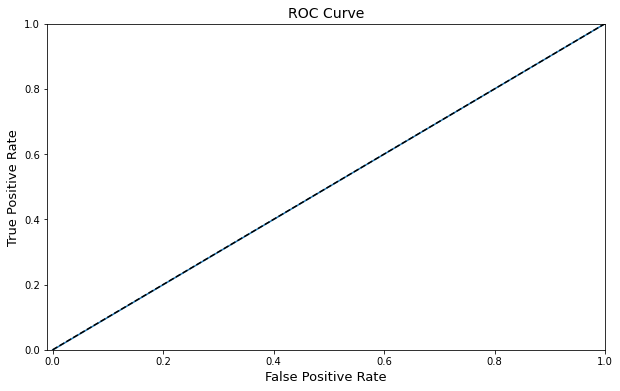

In [28]:
knn_fpr, knn_tpr, knn_thresold = roc_curve(y_test, knn_pred_class)

plt.figure(figsize=(10,6))
plt.plot(knn_fpr, knn_tpr, label='Logistic Regression Classifier Score: {:.4f}'.format(roc_auc_score(y_test, knn_pred_class)))
plt.plot([0, 1], [0, 1], 'k--')
plt.axis([-0.01, 1, 0, 1])
plt.title('ROC Curve', fontsize=14)
plt.xlabel('False Positive Rate', fontsize=13)
plt.ylabel('True Positive Rate', fontsize=13)

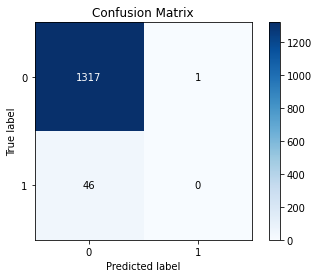

In [29]:
plot = skplt.metrics.plot_confusion_matrix(y_test, knn_pred_class)

# Isolation Forest

In [152]:
bank_data_copy = bank_data

In [193]:
iforest = IsolationForest(n_estimators=500, max_features=20, contamination = 0.032)

pred= iforest.fit_predict(x)
bank_data_copy['scores']=iforest.decision_function(x)
bank_data_copy['anomaly_label']=pred

In [194]:
bank_data_copy['anomaly']=bank_data_copy['anomaly_label'].apply(lambda x: 'outlier' if x==-1  else 'inlier')
fig=px.histogram(bank_data_copy,x='scores',color='anomaly')
fig.show()

In [195]:
idx = np.where((bank_data_copy.anomaly_label==-1) & (bank_data_copy['Bankrupt?'] == 0))
print(len(bank_data_copy.loc[idx]))

178


In [196]:
idx = np.where((bank_data_copy.anomaly_label==-1) & (bank_data_copy['Bankrupt?'] == 1))
print(len(bank_data_copy.loc[idx]))

41


#Neural Network

In [30]:
mlp = MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(5, 5), random_state=1)

mlp.fit(x_train, y_train)
mlp_pred_class = mlp.predict(x_test)

print(classification_report(y_test, mlp_pred_class))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1318
           1       0.00      0.00      0.00        46

    accuracy                           0.94      1364
   macro avg       0.48      0.49      0.48      1364
weighted avg       0.93      0.94      0.94      1364



Text(0, 0.5, 'True Positive Rate')

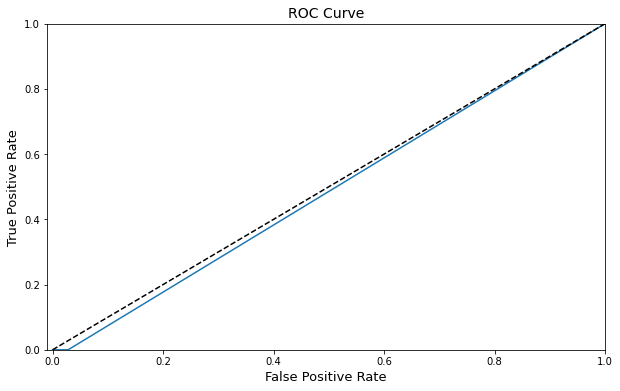

In [31]:
mlp_fpr, mlp_tpr, mlp_thresold = roc_curve(y_test, mlp_pred_class)

plt.figure(figsize=(10,6))
plt.plot(mlp_fpr, mlp_tpr, label='MLP Classifier Score: {:.4f}'.format(roc_auc_score(y_test, mlp_pred_class)))
plt.plot([0, 1], [0, 1], 'k--')
plt.axis([-0.01, 1, 0, 1])
plt.title('ROC Curve', fontsize=14)
plt.xlabel('False Positive Rate', fontsize=13)
plt.ylabel('True Positive Rate', fontsize=13)

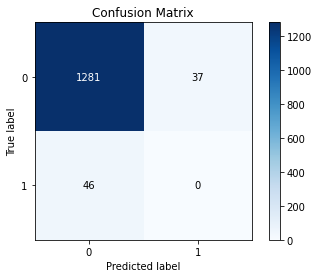

In [32]:
plot = skplt.metrics.plot_confusion_matrix(y_test, mlp_pred_class)

#XGBoost tuning with sherpa

In [33]:
parameters_xgb = [sherpa.Continuous('learning_rate', [0.01, 0.1]),
              sherpa.Discrete('max_depth', [3, 10]),
              sherpa.Discrete('min_child_weight', [1, 5]),
              sherpa.Continuous('subsample', [0.5, 0.7]),
              sherpa.Continuous('colsample_bytree', [0.5, 0.7]),
              sherpa.Discrete('n_estimators', [100, 500])]

algorithm_xgb = bayesian_optimization.GPyOpt(max_concurrent=1,model_type='GP_MCMC',acquisition_type='EI_MCMC',max_num_trials=10)

In [34]:
study_xgb = sherpa.Study(parameters=parameters_xgb,
                     algorithm=algorithm_xgb,
                     lower_is_better=False)

INFO:sherpa.core:
-------------------------------------------------------
SHERPA Dashboard running. Access via
http://172.28.0.2:8880 if on a cluster or
http://localhost:8880 if running locally.
-------------------------------------------------------


 * Serving Flask app "sherpa.app.app" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


In [35]:
for trial in study_xgb:
    print("Trial ", trial.id, " with parameters ", trial.parameters)
    xgb = XGBClassifier(learning_rate=trial.parameters['learning_rate'],
                                 max_depth=int(trial.parameters['max_depth']),
                                 min_child_weight=int(trial.parameters['min_child_weight']),
                                 subsample=trial.parameters['subsample'],
                                 colsample_bytree=trial.parameters['colsample_bytree'],
                                 n_estimators=int(trial.parameters['n_estimators']),
                                 objective= 'reg:squarederror')
    xgb.fit(x_train2, y_train2)
    xgb_pred_class = xgb.predict(x_test2)

    xgb_f1 = f1_score(y_test2, xgb_pred_class)

    print("F1 score: ", xgb_f1)
    study_xgb.add_observation(trial, iteration=1, objective=xgb_f1)
    study_xgb.finalize(trial)
print(study_xgb.get_best_result())




Trial  1  with parameters  {'learning_rate': 0.07470099763272965, 'max_depth': 5, 'min_child_weight': 3, 'subsample': 0.6163066591172346, 'colsample_bytree': 0.5542716578374435, 'n_estimators': 308}


INFO:numexpr.utils:NumExpr defaulting to 2 threads.


F1 score:  0.28571428571428575
Trial  2  with parameters  {'learning_rate': 0.08322897979579554, 'max_depth': 9, 'min_child_weight': 1, 'subsample': 0.6633959522621405, 'colsample_bytree': 0.6600571516646011, 'n_estimators': 407}
F1 score:  0.2222222222222222
Trial  3  with parameters  {'learning_rate': 0.03366293876989651, 'max_depth': 6, 'min_child_weight': 3, 'subsample': 0.575006653105771, 'colsample_bytree': 0.5267102889474706, 'n_estimators': 156}
F1 score:  0.14285714285714288
Trial  4  with parameters  {'learning_rate': 0.026909500525703456, 'max_depth': 4, 'min_child_weight': 1, 'subsample': 0.5963819021238027, 'colsample_bytree': 0.533788772632712, 'n_estimators': 260}
F1 score:  0.21428571428571425
Trial  5  with parameters  {'learning_rate': 0.07454836736686593, 'max_depth': 6, 'min_child_weight': 1, 'subsample': 0.6391950381546261, 'colsample_bytree': 0.5837278974585521, 'n_estimators': 189}
F1 score:  0.3225806451612903
Trial  6  with parameters  {'learning_rate': 0.06353

INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


F1 score:  0.28571428571428575
Trial  8  with parameters  {'learning_rate': 0.06450934674107714, 'max_depth': 6.0, 'min_child_weight': 1.0, 'subsample': 0.6214548697714422, 'colsample_bytree': 0.5868059900744911, 'n_estimators': 189.0}


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


F1 score:  0.2758620689655173
Trial  9  with parameters  {'learning_rate': 0.08070915214665092, 'max_depth': 6.0, 'min_child_weight': 1.0, 'subsample': 0.6500818495640203, 'colsample_bytree': 0.5818390705702344, 'n_estimators': 189.0}


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


F1 score:  0.24242424242424246
Trial  10  with parameters  {'learning_rate': 0.028131240275572584, 'max_depth': 6.0, 'min_child_weight': 1.0, 'subsample': 0.5560521203841268, 'colsample_bytree': 0.5979609776395166, 'n_estimators': 189.0}
F1 score:  0.20689655172413793
{'Trial-ID': 5, 'Iteration': 1, 'colsample_bytree': 0.5837278974585521, 'learning_rate': 0.07454836736686593, 'max_depth': 6.0, 'min_child_weight': 1.0, 'n_estimators': 189.0, 'subsample': 0.6391950381546261, 'Objective': 0.3225806451612903}


#SVM tuning with sherpa

In [36]:
parameters_svc = [sherpa.Continuous('C', [0.1, 1000]),
              sherpa.Continuous('gamma', [1, 0.0001]),
              sherpa.Choice('class_weight', ['balanced', None])]

algorithm_svc = bayesian_optimization.GPyOpt(max_concurrent=1,model_type='GP_MCMC',acquisition_type='EI_MCMC',max_num_trials=10)

In [37]:
study_svc = sherpa.Study(parameters=parameters_svc,
                     algorithm=algorithm_svc,
                     lower_is_better=False)

INFO:sherpa.core:
-------------------------------------------------------
SHERPA Dashboard running. Access via
http://172.28.0.2:8881 if on a cluster or
http://localhost:8881 if running locally.
-------------------------------------------------------


 * Serving Flask app "sherpa.app.app" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


In [38]:
for trial in study_svc:
    print("Trial ", trial.id, " with parameters ", trial.parameters)
    svc = SVC(C=trial.parameters['C'],
                                 gamma=trial.parameters['gamma'],
                                 kernel = 'rbf',
                                 class_weight=trial.parameters['class_weight'])
    svc.fit(x_train2, y_train2)
    svc_pred_class = svc.predict(x_test2)

    svc_f1 = f1_score(y_test2, svc_pred_class)

    print("F1 score: ", svc_f1)
    study_svc.add_observation(trial, iteration=1, objective=svc_f1)
    study_svc.finalize(trial)
print(study_svc.get_best_result())




Trial  1  with parameters  {'C': 13.614426471679057, 'gamma': 0.6751520092595465, 'class_weight': 'balanced'}
F1 score:  0.0
Trial  2  with parameters  {'C': 515.9510558217657, 'gamma': 0.9005028347267594, 'class_weight': None}
F1 score:  0.0
Trial  3  with parameters  {'C': 365.1995572894719, 'gamma': 0.19254744552066572, 'class_weight': 'balanced'}
F1 score:  0.0
Trial  4  with parameters  {'C': 587.2335363569626, 'gamma': 0.11443581254807245, 'class_weight': None}


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


F1 score:  0.0
Trial  5  with parameters  {'C': 779.6650186788045, 'gamma': 1.0, 'class_weight': 'balanced'}


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


F1 score:  0.0
Trial  6  with parameters  {'C': 832.1612079059431, 'gamma': 1.0, 'class_weight': 'balanced'}


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


F1 score:  0.0
Trial  7  with parameters  {'C': 200.64949680242572, 'gamma': 1.0, 'class_weight': None}


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


F1 score:  0.0
Trial  8  with parameters  {'C': 572.6470667208479, 'gamma': 1.0, 'class_weight': None}


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


F1 score:  0.0
Trial  9  with parameters  {'C': 355.8953860268737, 'gamma': 1.0, 'class_weight': None}


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


F1 score:  0.0
Trial  10  with parameters  {'C': 498.1946155692164, 'gamma': 1.0, 'class_weight': None}
F1 score:  0.0
{'Trial-ID': 1, 'Iteration': 1, 'C': 13.614426471679057, 'class_weight': 'balanced', 'gamma': 0.6751520092595465, 'Objective': 0.0}


#Random Forest tuning with sherpa

In [39]:
parameters_rf = [sherpa.Discrete('max_depth', [10, 100]),
              sherpa.Choice('max_features', ['auto', 'sqrt']),
              sherpa.Discrete('min_samples_leaf', [1, 4]),
              sherpa.Discrete('min_samples_split', [2, 10]),
              sherpa.Discrete('n_estimators', [200, 2000]),
              sherpa.Choice('class_weight', ['balanced', None]),
              sherpa.Choice('criterion', ['gini', 'entropy'])]

algorithm_rf = bayesian_optimization.GPyOpt(max_concurrent=1,model_type='GP_MCMC',acquisition_type='EI_MCMC',max_num_trials=10)

In [40]:
study_rf = sherpa.Study(parameters=parameters_rf,
                     algorithm=algorithm_rf,
                     lower_is_better=False)

INFO:sherpa.core:
-------------------------------------------------------
SHERPA Dashboard running. Access via
http://172.28.0.2:8882 if on a cluster or
http://localhost:8882 if running locally.
-------------------------------------------------------


 * Serving Flask app "sherpa.app.app" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


In [41]:
for trial in study_rf:
    print("Trial ", trial.id, " with parameters ", trial.parameters)
    rf = RandomForestClassifier(max_depth=int(trial.parameters['max_depth']),
                                 max_features=trial.parameters['max_features'],
                                 min_samples_leaf=int(trial.parameters['min_samples_leaf']),
                                 min_samples_split=int(trial.parameters['min_samples_split']),
                                 n_estimators=int(trial.parameters['n_estimators']),
                                 class_weight=trial.parameters['class_weight'],
                                 criterion=trial.parameters['criterion'])
    
    rf.fit(x_train2, y_train2)
    rf_pred_class = rf.predict(x_test2)

    rf_f1 = f1_score(y_test2, rf_pred_class)

    print("F1 score: ", rf_f1)
    study_rf.add_observation(trial, iteration=1, objective=rf_f1)
    study_rf.finalize(trial)
print(study_rf.get_best_result())




Trial  1  with parameters  {'max_depth': 96, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 6, 'n_estimators': 1563, 'class_weight': 'balanced', 'criterion': 'gini'}
F1 score:  0.30769230769230765
Trial  2  with parameters  {'max_depth': 36, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 4, 'n_estimators': 1170, 'class_weight': None, 'criterion': 'gini'}
F1 score:  0.16000000000000003
Trial  3  with parameters  {'max_depth': 46, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 6, 'n_estimators': 1667, 'class_weight': None, 'criterion': 'gini'}
F1 score:  0.15384615384615383
Trial  4  with parameters  {'max_depth': 79, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 8, 'n_estimators': 1977, 'class_weight': None, 'criterion': 'gini'}
F1 score:  0.14814814814814817
Trial  5  with parameters  {'max_depth': 28, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 223, 'class_we

INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


F1 score:  0.14814814814814817
Trial  9  with parameters  {'max_depth': 96, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 6, 'n_estimators': 1563, 'class_weight': 'balanced', 'criterion': 'gini'}


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


F1 score:  0.24
Trial  10  with parameters  {'max_depth': 96, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 6, 'n_estimators': 1563, 'class_weight': 'balanced', 'criterion': 'gini'}
F1 score:  0.30769230769230765
{'Trial-ID': 1, 'Iteration': 1, 'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 96, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 6, 'n_estimators': 1563, 'Objective': 0.30769230769230765}


#KNN tuning with sherpa

In [42]:
parameters_knn = [sherpa.Discrete('n_neighbors', [3, 15]),
              sherpa.Discrete('leaf_size', [20, 50]),
              sherpa.Choice('algorithm', ['ball_tree', 'kd_tree', 'brute']),
              sherpa.Choice('weights', ['uniform', 'distance'])]

algorithm_knn = bayesian_optimization.GPyOpt(max_concurrent=1,model_type='GP_MCMC',acquisition_type='EI_MCMC',max_num_trials=10)

In [43]:
study_knn = sherpa.Study(parameters=parameters_knn,
                     algorithm=algorithm_knn,
                     lower_is_better=False)

INFO:sherpa.core:
-------------------------------------------------------
SHERPA Dashboard running. Access via
http://172.28.0.2:8883 if on a cluster or
http://localhost:8883 if running locally.
-------------------------------------------------------


 * Serving Flask app "sherpa.app.app" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


In [44]:
for trial in study_knn:
    print("Trial ", trial.id, " with parameters ", trial.parameters)
    knn = KNeighborsClassifier(n_neighbors=trial.parameters['n_neighbors'],
                                 leaf_size=int(trial.parameters['leaf_size']),
                                 algorithm=trial.parameters['algorithm'],
                                 weights=trial.parameters['weights'])
    knn.fit(x_train2, y_train2)
    knn_pred_class = knn.predict(x_test2)

    knn_f1 = f1_score(y_test2, knn_pred_class)

    print("F1 score: ", knn_f1)
    study_knn.add_observation(trial, iteration=1, objective=knn_f1)
    study_knn.finalize(trial)
print(study_knn.get_best_result())




Trial  1  with parameters  {'n_neighbors': 8, 'leaf_size': 37, 'algorithm': 'brute', 'weights': 'distance'}
F1 score:  0.0
Trial  2  with parameters  {'n_neighbors': 12, 'leaf_size': 37, 'algorithm': 'ball_tree', 'weights': 'distance'}
F1 score:  0.0
Trial  3  with parameters  {'n_neighbors': 12, 'leaf_size': 42, 'algorithm': 'ball_tree', 'weights': 'distance'}
F1 score:  0.0
Trial  4  with parameters  {'n_neighbors': 14, 'leaf_size': 47, 'algorithm': 'brute', 'weights': 'uniform'}
F1 score:  0.0
Trial  5  with parameters  {'n_neighbors': 8, 'leaf_size': 25, 'algorithm': 'brute', 'weights': 'uniform'}


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


F1 score:  0.0


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


Trial  6  with parameters  {'n_neighbors': 12, 'leaf_size': 47, 'algorithm': 'brute', 'weights': 'uniform'}
F1 score:  0.0


Trial  7  with parameters  {'n_neighbors': 6, 'leaf_size': 31, 'algorithm': 'ball_tree', 'weights': 'distance'}


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


F1 score:  0.0


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


Trial  8  with parameters  {'n_neighbors': 14, 'leaf_size': 25, 'algorithm': 'brute', 'weights': 'distance'}
F1 score:  0.0
Trial  9  with parameters  {'n_neighbors': 8, 'leaf_size': 43, 'algorithm': 'ball_tree', 'weights': 'distance'}


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


F1 score:  0.0
Trial  10  with parameters  {'n_neighbors': 7, 'leaf_size': 44, 'algorithm': 'ball_tree', 'weights': 'distance'}
F1 score:  0.0
{'Trial-ID': 1, 'Iteration': 1, 'algorithm': 'brute', 'leaf_size': 37, 'n_neighbors': 8, 'weights': 'distance', 'Objective': 0.0}


#Balancing data: Oversampling with SMOTE

In [45]:
oversample = SMOTE()
x_oversampled, y_oversampled = oversample.fit_resample(x, y)
x_train_oversampled, x_test_oversampled, y_train_oversampled, y_test_oversampled = train_test_split(x_oversampled, y_oversampled, test_size = 0.2, random_state = 0)

print('Original dataset shape %s' % Counter(y))
print('Resampled dataset shape %s' % Counter(y_oversampled))

Original dataset shape Counter({0: 6599, 1: 220})
Resampled dataset shape Counter({1: 6599, 0: 6599})


In [46]:
x_train_oversampled2, x_test_oversampled2, y_train_oversampled2, y_test_oversampled2 = train_test_split(x_oversampled, y_oversampled, test_size = 0.2, random_state = 0)

In [47]:
x_validation_oversampled, x_test_oversampled2, y_validation_oversampled, y_test_oversampled2 = train_test_split(x_test_oversampled2, y_test_oversampled2, test_size = 0.5, random_state = 0)

#LogisticRegression oversampled

In [48]:
lr_oversampled = LogisticRegression(random_state=0, max_iter = 100000)

lr_oversampled.fit(x_train_oversampled,y_train_oversampled)
lr_oversampled_pred_class = lr_oversampled.predict(x_test_oversampled)
lr_oversampled_pred_class_original = lr_oversampled.predict(x_test)

print(classification_report(y_test_oversampled, lr_oversampled_pred_class))
print(classification_report(y_test, lr_oversampled_pred_class_original))

              precision    recall  f1-score   support

           0       0.56      0.78      0.65      1269
           1       0.68      0.44      0.54      1371

    accuracy                           0.60      2640
   macro avg       0.62      0.61      0.60      2640
weighted avg       0.63      0.60      0.59      2640

              precision    recall  f1-score   support

           0       0.98      0.78      0.87      1318
           1       0.07      0.46      0.12        46

    accuracy                           0.77      1364
   macro avg       0.52      0.62      0.49      1364
weighted avg       0.95      0.77      0.84      1364



Text(0, 0.5, 'True Positive Rate')

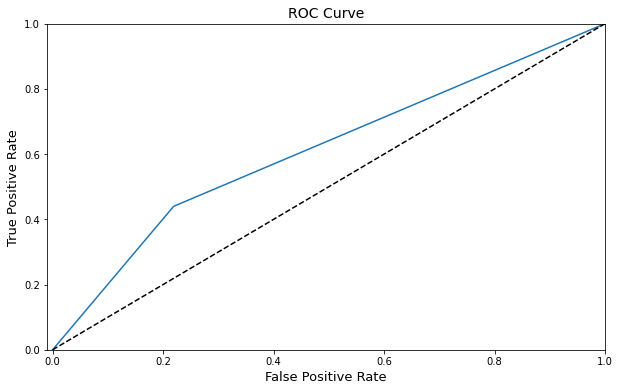

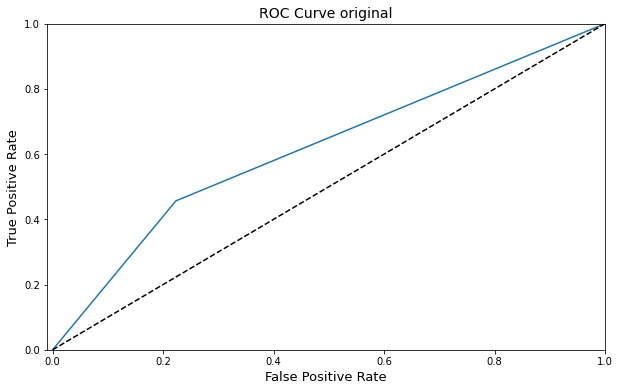

In [49]:
log_oversampled_fpr, log_oversampled_tpr, log_oversampled_thresold = roc_curve(y_test_oversampled, lr_oversampled_pred_class)

plt.figure(figsize=(10,6))
plt.plot(log_oversampled_fpr, log_oversampled_tpr, label='Logistic Regression Classifier Score: {:.4f}'.format(roc_auc_score(y_test_oversampled, lr_oversampled_pred_class)))
plt.plot([0, 1], [0, 1], 'k--')
plt.axis([-0.01, 1, 0, 1])
plt.title('ROC Curve', fontsize=14)
plt.xlabel('False Positive Rate', fontsize=13)
plt.ylabel('True Positive Rate', fontsize=13)



log_oversampled_fpr, log_oversampled_tpr, log_oversampled_thresold = roc_curve(y_test, lr_oversampled_pred_class_original)

plt.figure(figsize=(10,6))
plt.plot(log_oversampled_fpr, log_oversampled_tpr, label='Logistic Regression Classifier Score: {:.4f}'.format(roc_auc_score(y_test, lr_oversampled_pred_class_original)))
plt.plot([0, 1], [0, 1], 'k--')
plt.axis([-0.01, 1, 0, 1])
plt.title('ROC Curve original', fontsize=14)
plt.xlabel('False Positive Rate', fontsize=13)
plt.ylabel('True Positive Rate', fontsize=13)

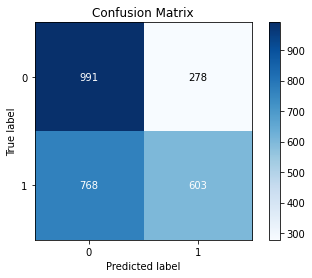

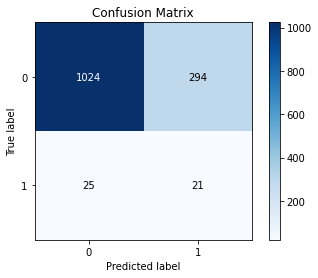

In [50]:
plot = skplt.metrics.plot_confusion_matrix(y_test_oversampled, lr_oversampled_pred_class)
plot = skplt.metrics.plot_confusion_matrix(y_test, lr_oversampled_pred_class_original)

#LinearDiscriminantAnalysis oversampled

In [51]:
ld_oversampled = LinearDiscriminantAnalysis()

ld_oversampled.fit(x_train_oversampled,y_train_oversampled)
ld_oversampled_pred_class = ld_oversampled.predict(x_test_oversampled)
ld_oversampled_pred_class_original = ld_oversampled.predict(x_test)

print(classification_report(y_test_oversampled, ld_oversampled_pred_class))
print(classification_report(y_test, ld_oversampled_pred_class_original))

              precision    recall  f1-score   support

           0       0.89      0.87      0.88      1269
           1       0.89      0.90      0.89      1371

    accuracy                           0.89      2640
   macro avg       0.89      0.89      0.89      2640
weighted avg       0.89      0.89      0.89      2640

              precision    recall  f1-score   support

           0       0.99      0.89      0.94      1318
           1       0.22      0.87      0.35        46

    accuracy                           0.89      1364
   macro avg       0.61      0.88      0.64      1364
weighted avg       0.97      0.89      0.92      1364



Text(0, 0.5, 'True Positive Rate')

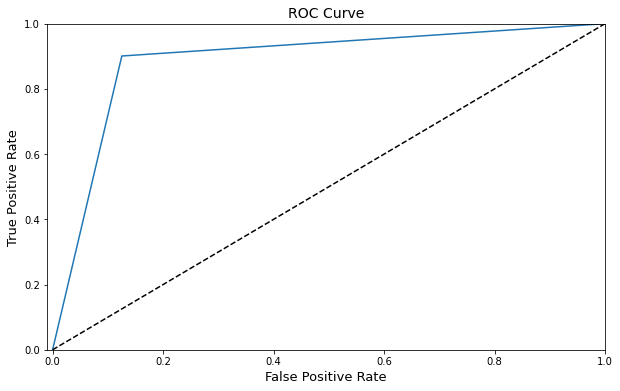

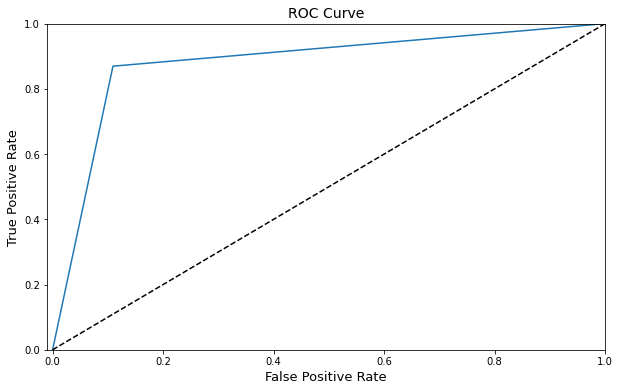

In [52]:
ld_oversampled_fpr, ld_oversampled_tpr, ld_oversampled_thresold = roc_curve(y_test_oversampled, ld_oversampled_pred_class)

plt.figure(figsize=(10,6))
plt.plot(ld_oversampled_fpr, ld_oversampled_tpr, label='Logistic Regression Classifier Score: {:.4f}'.format(roc_auc_score(y_test_oversampled, ld_oversampled_pred_class)))
plt.plot([0, 1], [0, 1], 'k--')
plt.axis([-0.01, 1, 0, 1])
plt.title('ROC Curve', fontsize=14)
plt.xlabel('False Positive Rate', fontsize=13)
plt.ylabel('True Positive Rate', fontsize=13)




ld_oversampled_fpr, ld_oversampled_tpr, ld_oversampled_thresold = roc_curve(y_test, ld_oversampled_pred_class_original)

plt.figure(figsize=(10,6))
plt.plot(ld_oversampled_fpr, ld_oversampled_tpr, label='Logistic Regression Classifier Score: {:.4f}'.format(roc_auc_score(y_test, ld_oversampled_pred_class_original)))
plt.plot([0, 1], [0, 1], 'k--')
plt.axis([-0.01, 1, 0, 1])
plt.title('ROC Curve', fontsize=14)
plt.xlabel('False Positive Rate', fontsize=13)
plt.ylabel('True Positive Rate', fontsize=13)

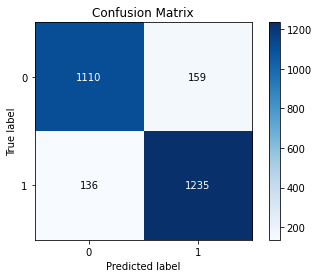

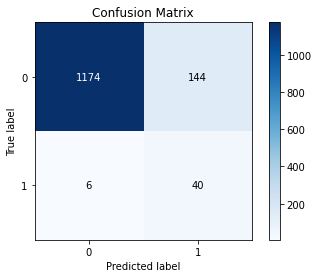

In [53]:
plot = skplt.metrics.plot_confusion_matrix(y_test_oversampled, ld_oversampled_pred_class)
plot = skplt.metrics.plot_confusion_matrix(y_test, ld_oversampled_pred_class_original)

#XGBoost oversampled

In [54]:
xgb_oversampled = XGBClassifier()

xgb_oversampled.fit(x_train_oversampled,y_train_oversampled)
xgb_oversampled_pred_class = xgb_oversampled.predict(x_test_oversampled)
xgb_oversampled_pred_class_original = xgb_oversampled.predict(x_test)

print(classification_report(y_test_oversampled, xgb_oversampled_pred_class))
print(classification_report(y_test, xgb_oversampled_pred_class_original))

              precision    recall  f1-score   support

           0       0.99      0.94      0.96      1269
           1       0.95      0.99      0.97      1371

    accuracy                           0.97      2640
   macro avg       0.97      0.96      0.97      2640
weighted avg       0.97      0.97      0.97      2640

              precision    recall  f1-score   support

           0       1.00      0.96      0.98      1318
           1       0.42      0.91      0.58        46

    accuracy                           0.95      1364
   macro avg       0.71      0.93      0.78      1364
weighted avg       0.98      0.95      0.96      1364



Text(0, 0.5, 'True Positive Rate')

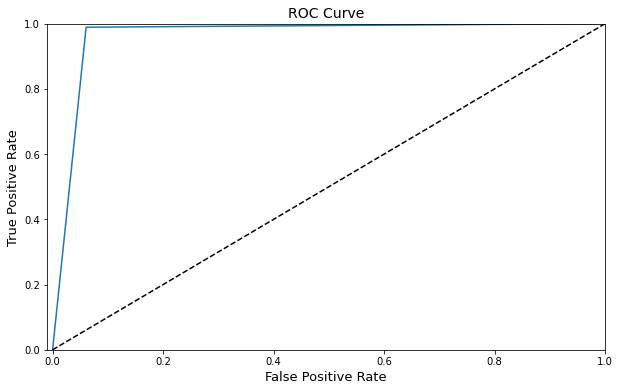

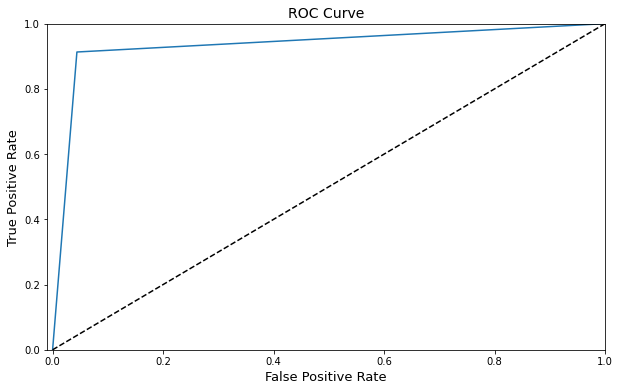

In [55]:
xgb_oversampled_fpr, xgb_oversampled_tpr, xgb_oversampled_thresold = roc_curve(y_test_oversampled, xgb_oversampled_pred_class)

plt.figure(figsize=(10,6))
plt.plot(xgb_oversampled_fpr, xgb_oversampled_tpr, label='Logistic Regression Classifier Score: {:.4f}'.format(roc_auc_score(y_test_oversampled, xgb_oversampled_pred_class)))
plt.plot([0, 1], [0, 1], 'k--')
plt.axis([-0.01, 1, 0, 1])
plt.title('ROC Curve', fontsize=14)
plt.xlabel('False Positive Rate', fontsize=13)
plt.ylabel('True Positive Rate', fontsize=13)




xgb_oversampled_fpr, xgb_oversampled_tpr, xgb_oversampled_thresold = roc_curve(y_test, xgb_oversampled_pred_class_original)

plt.figure(figsize=(10,6))
plt.plot(xgb_oversampled_fpr, xgb_oversampled_tpr, label='Logistic Regression Classifier Score: {:.4f}'.format(roc_auc_score(y_test, xgb_oversampled_pred_class_original)))
plt.plot([0, 1], [0, 1], 'k--')
plt.axis([-0.01, 1, 0, 1])
plt.title('ROC Curve', fontsize=14)
plt.xlabel('False Positive Rate', fontsize=13)
plt.ylabel('True Positive Rate', fontsize=13)

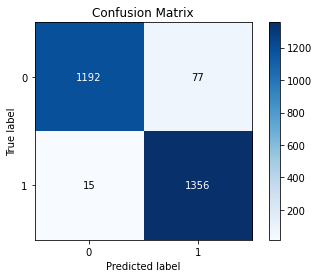

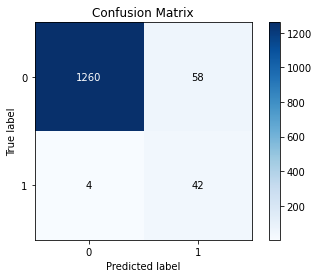

In [56]:
plot = skplt.metrics.plot_confusion_matrix(y_test_oversampled, xgb_oversampled_pred_class)
plot = skplt.metrics.plot_confusion_matrix(y_test, xgb_oversampled_pred_class_original)

#SVM oversampled

In [57]:
svc_oversampled = SVC(kernel = 'rbf')

svc_oversampled.fit(x_train_oversampled,y_train_oversampled)
svc_oversampled_pred_class = svc_oversampled.predict(x_test_oversampled)
svc_oversampled_pred_class_original = svc_oversampled.predict(x_test)

print(classification_report(y_test_oversampled, svc_oversampled_pred_class))
print(classification_report(y_test, svc_oversampled_pred_class_original))

              precision    recall  f1-score   support

           0       0.85      0.78      0.81      1269
           1       0.81      0.87      0.84      1371

    accuracy                           0.83      2640
   macro avg       0.83      0.83      0.83      2640
weighted avg       0.83      0.83      0.83      2640

              precision    recall  f1-score   support

           0       0.99      0.79      0.88      1318
           1       0.12      0.80      0.20        46

    accuracy                           0.79      1364
   macro avg       0.55      0.80      0.54      1364
weighted avg       0.96      0.79      0.85      1364



Text(0, 0.5, 'True Positive Rate')

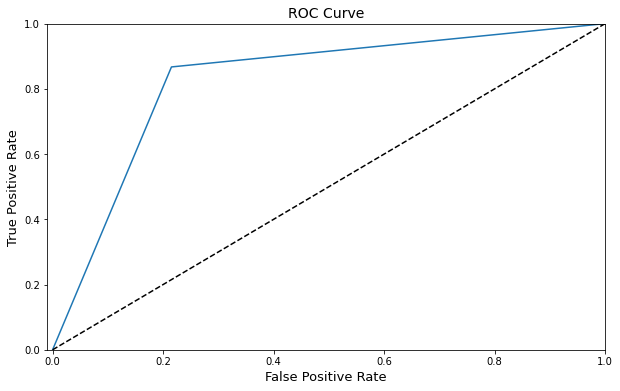

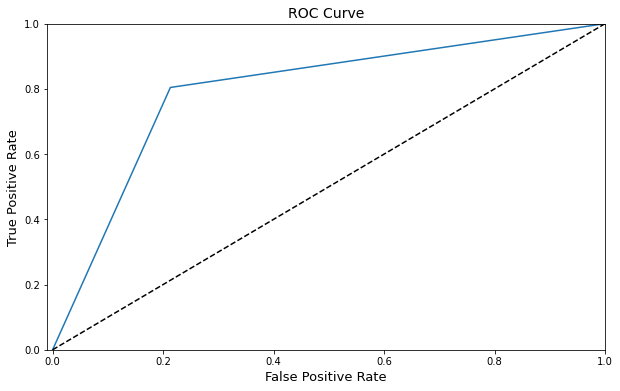

In [58]:
svc_oversampled_fpr, svc_oversampled_tpr, svc_oversampled_thresold = roc_curve(y_test_oversampled, svc_oversampled_pred_class)

plt.figure(figsize=(10,6))
plt.plot(svc_oversampled_fpr, svc_oversampled_tpr, label='Logistic Regression Classifier Score: {:.4f}'.format(roc_auc_score(y_test_oversampled, svc_oversampled_pred_class)))
plt.plot([0, 1], [0, 1], 'k--')
plt.axis([-0.01, 1, 0, 1])
plt.title('ROC Curve', fontsize=14)
plt.xlabel('False Positive Rate', fontsize=13)
plt.ylabel('True Positive Rate', fontsize=13)




svc_oversampled_fpr, svc_oversampled_tpr, svc_oversampled_thresold = roc_curve(y_test, svc_oversampled_pred_class_original)

plt.figure(figsize=(10,6))
plt.plot(svc_oversampled_fpr, svc_oversampled_tpr, label='Logistic Regression Classifier Score: {:.4f}'.format(roc_auc_score(y_test, svc_oversampled_pred_class_original)))
plt.plot([0, 1], [0, 1], 'k--')
plt.axis([-0.01, 1, 0, 1])
plt.title('ROC Curve', fontsize=14)
plt.xlabel('False Positive Rate', fontsize=13)
plt.ylabel('True Positive Rate', fontsize=13)

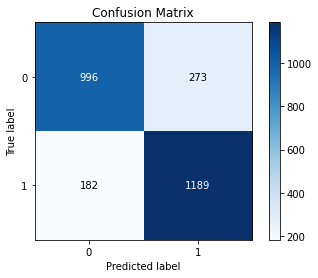

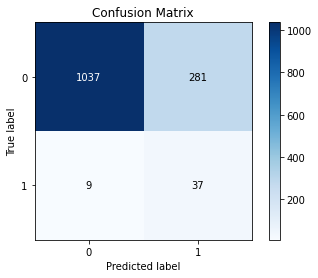

In [59]:
plot = skplt.metrics.plot_confusion_matrix(y_test_oversampled, svc_oversampled_pred_class)
plot = skplt.metrics.plot_confusion_matrix(y_test, svc_oversampled_pred_class_original)

#Random Forest oversampled

In [60]:
rf_oversampled = RandomForestClassifier()

rf_oversampled.fit(x_train_oversampled,y_train_oversampled)
rf_oversampled_pred_class = rf_oversampled.predict(x_test_oversampled)
rf_oversampled_pred_class_original = rf_oversampled.predict(x_test)

print(classification_report(y_test_oversampled, rf_oversampled_pred_class))
print(classification_report(y_test, rf_oversampled_pred_class_original))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98      1269
           1       0.97      1.00      0.99      1371

    accuracy                           0.98      2640
   macro avg       0.99      0.98      0.98      2640
weighted avg       0.99      0.98      0.98      2640

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1318
           1       0.94      0.98      0.96        46

    accuracy                           1.00      1364
   macro avg       0.97      0.99      0.98      1364
weighted avg       1.00      1.00      1.00      1364



Text(0, 0.5, 'True Positive Rate')

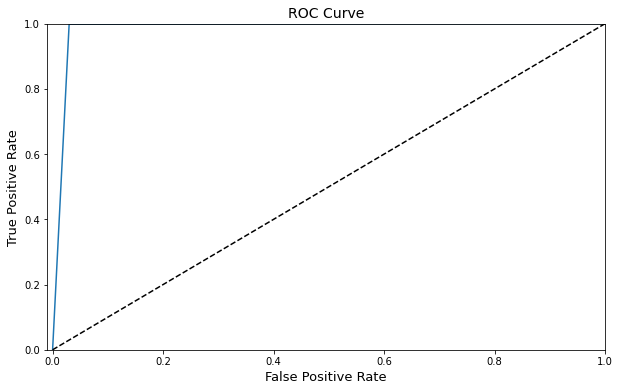

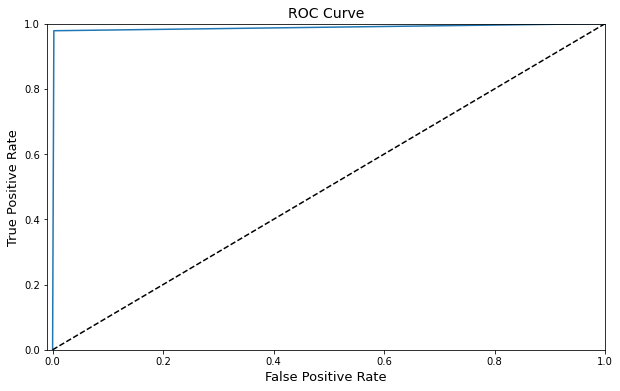

In [61]:
rf_oversampled_fpr, rf_oversampled_tpr, rf_oversampled_thresold = roc_curve(y_test_oversampled, rf_oversampled_pred_class)

plt.figure(figsize=(10,6))
plt.plot(rf_oversampled_fpr, rf_oversampled_tpr, label='Logistic Regression Classifier Score: {:.4f}'.format(roc_auc_score(y_test_oversampled, rf_oversampled_pred_class)))
plt.plot([0, 1], [0, 1], 'k--')
plt.axis([-0.01, 1, 0, 1])
plt.title('ROC Curve', fontsize=14)
plt.xlabel('False Positive Rate', fontsize=13)
plt.ylabel('True Positive Rate', fontsize=13)




rf_oversampled_fpr, rf_oversampled_tpr, rf_oversampled_thresold = roc_curve(y_test, rf_oversampled_pred_class_original)

plt.figure(figsize=(10,6))
plt.plot(rf_oversampled_fpr, rf_oversampled_tpr, label='Logistic Regression Classifier Score: {:.4f}'.format(roc_auc_score(y_test, rf_oversampled_pred_class_original)))
plt.plot([0, 1], [0, 1], 'k--')
plt.axis([-0.01, 1, 0, 1])
plt.title('ROC Curve', fontsize=14)
plt.xlabel('False Positive Rate', fontsize=13)
plt.ylabel('True Positive Rate', fontsize=13)

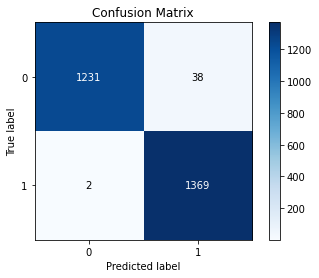

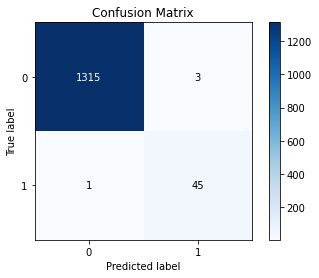

In [62]:
plot = skplt.metrics.plot_confusion_matrix(y_test_oversampled, rf_oversampled_pred_class)
plot = skplt.metrics.plot_confusion_matrix(y_test, rf_oversampled_pred_class_original)

#Importância de cada feature (de acordo com a random forest)

In [63]:
importances = pd.DataFrame({'feature':x_train_oversampled.columns,'importance':np.round(rf_oversampled.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances = importances.transpose()
importances

feature,Net Income to Total Assets,Continuous interest rate (after tax),Persistent EPS in the Last Four Seasons,After-tax net Interest Rate,Total debt/Total net worth,Retained Earnings to Total Assets,ROA(C) before interest and depreciation before interest,Net Income to Stockholder's Equity,Total income/Total expense,Debt ratio %,Borrowing dependency,ROA(A) before interest and % after tax,Net profit before tax/Paid-in capital,ROA(B) before interest and depreciation after tax,Net worth/Assets,Pre-tax net Interest Rate,Per Share Net profit before tax (Yuan ¥),Quick Ratio,Liability to Equity,Interest-bearing debt interest rate,Degree of Financial Leverage (DFL),Net Value Growth Rate,Interest Expense Ratio,Current Liabilities/Equity,Equity to Liability,Net Value Per Share (A),Interest Coverage Ratio (Interest expense to EBIT),Allocation rate per person,Cash Turnover Rate,Current Liability to Equity,Current Liability to Assets,Total Asset Growth Rate,Non-industry income and expenditure/revenue,Average Collection Days,Inventory/Working Capital,Long-term Liability to Current Assets,Fixed Assets Turnover Frequency,Current Asset Turnover Rate,Quick Asset Turnover Rate,After-tax Net Profit Growth Rate,...,Operating Profit Rate,Current Liabilities/Liability,Current Liability to Liability,Regular Net Profit Growth Rate,Realized Sales Gross Margin,Inventory Turnover Rate (times),Cash/Current Liability,Continuous Net Profit Growth Rate,Operating Profit Per Share (Yuan ¥),Quick Assets/Total Assets,Cash/Total Assets,Accounts Receivable Turnover,Total Asset Turnover,Cash Reinvestment %,Cash Flow to Liability,Realized Sales Gross Profit Growth Rate,Current Ratio,No-credit Interval,Gross Profit to Sales,Total Asset Return Growth Rate Ratio,Operating Profit Growth Rate,Operating Gross Margin,Revenue Per Share (Yuan ¥),Cash Flow Per Share,Net Value Per Share (C),Operating profit/Paid-in capital,Working capitcal Turnover Rate,Tax rate (A),Operating Expense Rate,Net Worth Turnover Rate (times),Cash flow rate,Working Capital/Equity,Current Assets/Total Assets,Operating Funds to Liability,Long-term fund suitability ratio (A),CFO to Assets,Fixed Assets to Assets,Inventory and accounts receivable/Net value,Liability-Assets Flag,Net Income Flag
importance,0.069,0.058,0.052,0.05,0.046,0.04,0.033,0.029,0.028,0.028,0.028,0.027,0.024,0.023,0.022,0.02,0.019,0.017,0.016,0.015,0.011,0.01,0.01,0.01,0.01,0.01,0.009,0.009,0.009,0.008,0.007,0.007,0.007,0.007,0.006,0.006,0.006,0.006,0.006,0.006,...,0.004,0.004,0.004,0.004,0.004,0.004,0.004,0.004,0.004,0.004,0.004,0.004,0.004,0.003,0.003,0.003,0.003,0.003,0.003,0.003,0.003,0.003,0.003,0.003,0.003,0.003,0.003,0.003,0.003,0.003,0.003,0.003,0.003,0.003,0.002,0.002,0.002,0.002,0.0,0.0


#KNN oversampled

In [64]:
knn_oversampled = KNeighborsClassifier(n_neighbors = 5)

knn_oversampled.fit(x_train_oversampled,y_train_oversampled)
knn_oversampled_pred_class = knn_oversampled.predict(x_test_oversampled)
knn_oversampled_pred_class_original = knn_oversampled.predict(x_test)

print(classification_report(y_test_oversampled, knn_oversampled_pred_class))
print(classification_report(y_test, knn_oversampled_pred_class_original))

              precision    recall  f1-score   support

           0       0.98      0.86      0.91      1269
           1       0.88      0.98      0.93      1371

    accuracy                           0.92      2640
   macro avg       0.93      0.92      0.92      2640
weighted avg       0.93      0.92      0.92      2640

              precision    recall  f1-score   support

           0       1.00      0.88      0.94      1318
           1       0.23      1.00      0.37        46

    accuracy                           0.89      1364
   macro avg       0.61      0.94      0.65      1364
weighted avg       0.97      0.89      0.92      1364



Text(0, 0.5, 'True Positive Rate')

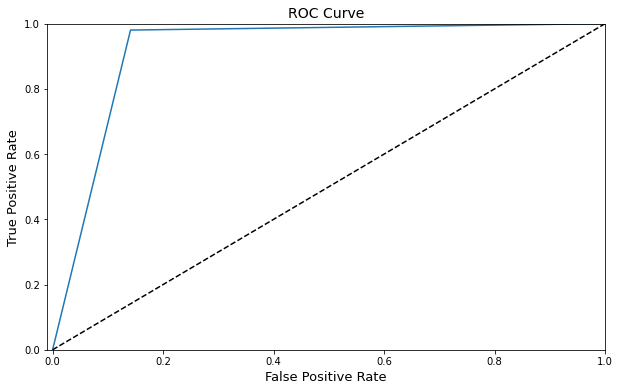

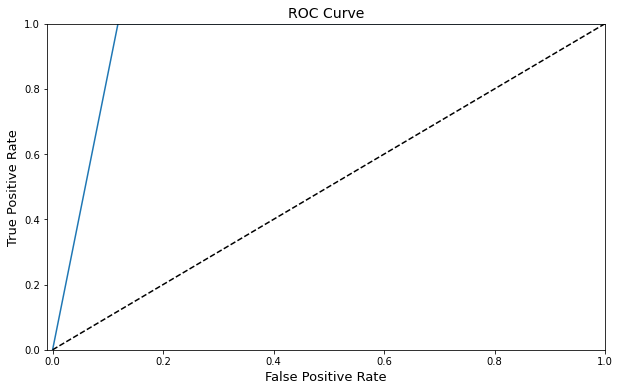

In [65]:
knn_oversampled_fpr, knn_oversampled_tpr, knn_oversampled_thresold = roc_curve(y_test_oversampled, knn_oversampled_pred_class)

plt.figure(figsize=(10,6))
plt.plot(knn_oversampled_fpr, knn_oversampled_tpr, label='Logistic Regression Classifier Score: {:.4f}'.format(roc_auc_score(y_test_oversampled, knn_oversampled_pred_class)))
plt.plot([0, 1], [0, 1], 'k--')
plt.axis([-0.01, 1, 0, 1])
plt.title('ROC Curve', fontsize=14)
plt.xlabel('False Positive Rate', fontsize=13)
plt.ylabel('True Positive Rate', fontsize=13)




knn_oversampled_fpr, knn_oversampled_tpr, knn_oversampled_thresold = roc_curve(y_test, knn_oversampled_pred_class_original)

plt.figure(figsize=(10,6))
plt.plot(knn_oversampled_fpr, knn_oversampled_tpr, label='Logistic Regression Classifier Score: {:.4f}'.format(roc_auc_score(y_test, knn_oversampled_pred_class_original)))
plt.plot([0, 1], [0, 1], 'k--')
plt.axis([-0.01, 1, 0, 1])
plt.title('ROC Curve', fontsize=14)
plt.xlabel('False Positive Rate', fontsize=13)
plt.ylabel('True Positive Rate', fontsize=13)

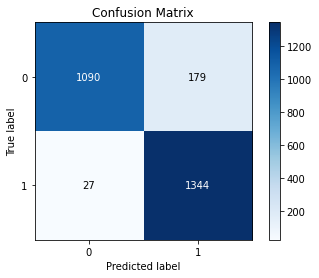

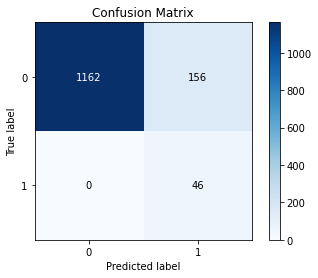

In [66]:
plot = skplt.metrics.plot_confusion_matrix(y_test_oversampled, knn_oversampled_pred_class)
plot = skplt.metrics.plot_confusion_matrix(y_test, knn_oversampled_pred_class_original)

#Neural Network oversampled

In [67]:
mlp_oversampled = MLPClassifier(solver='adam', max_iter=1000, alpha=1e-5, hidden_layer_sizes=(20,20), random_state=1)

mlp_oversampled.fit(x_train_oversampled, y_train_oversampled)
mlp_oversampled_pred_class = mlp_oversampled.predict(x_test_oversampled)
mlp_oversampled_pred_class_original = mlp_oversampled.predict(x_test)

print(classification_report(y_test_oversampled, mlp_oversampled_pred_class))
print(classification_report(y_test, mlp_oversampled_pred_class_original))

              precision    recall  f1-score   support

           0       0.69      0.81      0.75      1269
           1       0.79      0.67      0.73      1371

    accuracy                           0.74      2640
   macro avg       0.74      0.74      0.74      2640
weighted avg       0.74      0.74      0.74      2640

              precision    recall  f1-score   support

           0       0.99      0.83      0.90      1318
           1       0.14      0.76      0.23        46

    accuracy                           0.83      1364
   macro avg       0.56      0.80      0.57      1364
weighted avg       0.96      0.83      0.88      1364



Text(0, 0.5, 'True Positive Rate')

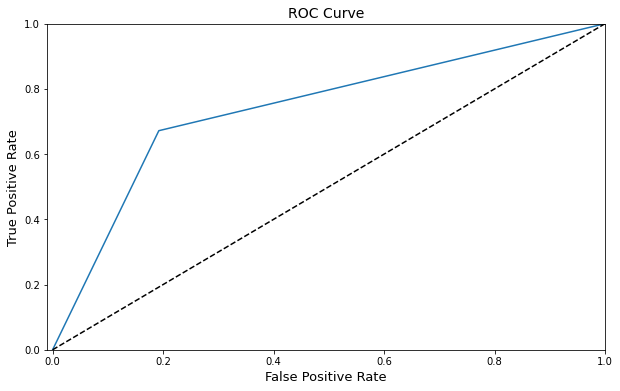

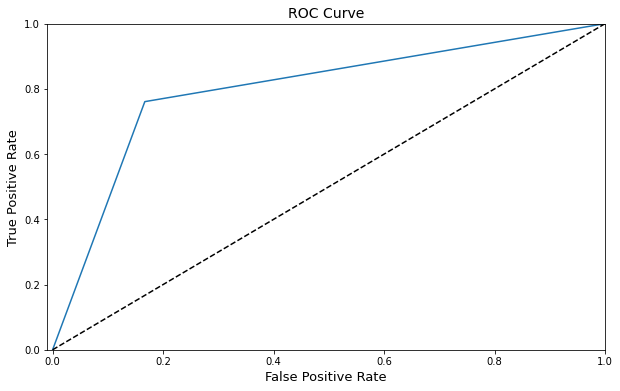

In [69]:
mlp_oversampled_fpr, mlp_oversampled_tpr, mlp_oversampled_thresold = roc_curve(y_test_oversampled, mlp_oversampled_pred_class)

plt.figure(figsize=(10,6))
plt.plot(mlp_oversampled_fpr, mlp_oversampled_tpr, label='mlp_oversampled Classifier Score: {:.4f}'.format(roc_auc_score(y_test_oversampled, mlp_oversampled_pred_class)))
plt.plot([0, 1], [0, 1], 'k--')
plt.axis([-0.01, 1, 0, 1])
plt.title('ROC Curve', fontsize=14)
plt.xlabel('False Positive Rate', fontsize=13)
plt.ylabel('True Positive Rate', fontsize=13)




mlp_oversampled_fpr, mlp_oversampled_tpr, mlp_oversampled_thresold = roc_curve(y_test, mlp_oversampled_pred_class_original)

plt.figure(figsize=(10,6))
plt.plot(mlp_oversampled_fpr, mlp_oversampled_tpr, label='mlp_oversampled Classifier Score: {:.4f}'.format(roc_auc_score(y_test, mlp_oversampled_pred_class_original)))
plt.plot([0, 1], [0, 1], 'k--')
plt.axis([-0.01, 1, 0, 1])
plt.title('ROC Curve', fontsize=14)
plt.xlabel('False Positive Rate', fontsize=13)
plt.ylabel('True Positive Rate', fontsize=13)

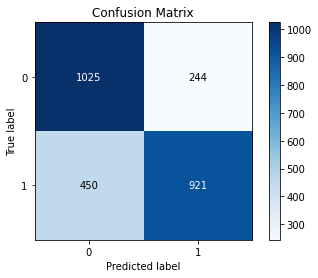

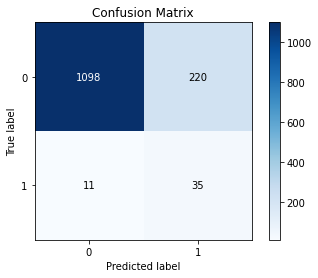

In [70]:
plot = skplt.metrics.plot_confusion_matrix(y_test_oversampled, mlp_oversampled_pred_class)
plot = skplt.metrics.plot_confusion_matrix(y_test, mlp_oversampled_pred_class_original)


#XGBoost tuning with sherpa + SMOTE

In [71]:
parameters_xgb = [sherpa.Continuous('learning_rate', [0.01, 0.1]),
              sherpa.Discrete('max_depth', [3, 10]),
              sherpa.Discrete('min_child_weight', [1, 5]),
              sherpa.Continuous('subsample', [0.5, 0.7]),
              sherpa.Continuous('colsample_bytree', [0.5, 0.7]),
              sherpa.Discrete('n_estimators', [100, 500]),]

algorithm_xgb = bayesian_optimization.GPyOpt(max_concurrent=1,model_type='GP_MCMC',acquisition_type='EI_MCMC',max_num_trials=10)

In [72]:
study_xgb = sherpa.Study(parameters=parameters_xgb,
                     algorithm=algorithm_xgb,
                     lower_is_better=False)

INFO:sherpa.core:
-------------------------------------------------------
SHERPA Dashboard running. Access via
http://172.28.0.2:8884 if on a cluster or
http://localhost:8884 if running locally.
-------------------------------------------------------


 * Serving Flask app "sherpa.app.app" (lazy loading)
 * Debug mode: on
 * Environment: production
   Use a production WSGI server instead.


In [73]:
for trial in study_xgb:
    print("Trial ", trial.id, " with parameters ", trial.parameters)
    xgb = XGBClassifier(learning_rate=trial.parameters['learning_rate'],
                                 max_depth=int(trial.parameters['max_depth']),
                                 min_child_weight=int(trial.parameters['min_child_weight']),
                                 subsample=trial.parameters['subsample'],
                                 colsample_bytree=trial.parameters['colsample_bytree'],
                                 n_estimators=int(trial.parameters['n_estimators']),
                                 objective= 'reg:squarederror')
    
    xgb.fit(x_train_oversampled2, y_train_oversampled2)
    xgb_pred_class = xgb.predict(x_test_oversampled2)

    xgb_f1 = f1_score(y_test_oversampled2, xgb_pred_class)

    print("F1 score: ", xgb_f1)
    study_xgb.add_observation(trial, iteration=1, objective=xgb_f1)
    study_xgb.finalize(trial)
print(study_xgb.get_best_result())




Trial  1  with parameters  {'learning_rate': 0.09396254716970819, 'max_depth': 7, 'min_child_weight': 2, 'subsample': 0.6716954136169129, 'colsample_bytree': 0.5447961111376619, 'n_estimators': 489}
F1 score:  0.9866102889358703
Trial  2  with parameters  {'learning_rate': 0.014002735680696092, 'max_depth': 9, 'min_child_weight': 4, 'subsample': 0.6981200358700046, 'colsample_bytree': 0.572300357285847, 'n_estimators': 141}
F1 score:  0.9824314827828532
Trial  3  with parameters  {'learning_rate': 0.01571196504551904, 'max_depth': 4, 'min_child_weight': 4, 'subsample': 0.5752563953585772, 'colsample_bytree': 0.5982318939836843, 'n_estimators': 104}
F1 score:  0.9438202247191012
Trial  4  with parameters  {'learning_rate': 0.08271685452585692, 'max_depth': 5, 'min_child_weight': 2, 'subsample': 0.5618559350276136, 'colsample_bytree': 0.6388938874931694, 'n_estimators': 484}
F1 score:  0.9887005649717514
Trial  5  with parameters  {'learning_rate': 0.030535945984311447, 'max_depth': 3, '

INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


F1 score:  0.9900990099009901
Trial  8  with parameters  {'learning_rate': 0.016969841954686215, 'max_depth': 8.0, 'min_child_weight': 4.0, 'subsample': 0.5979684246109993, 'colsample_bytree': 0.5855354427336438, 'n_estimators': 425.0}


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


F1 score:  0.9873060648801127
Trial  9  with parameters  {'learning_rate': 0.01, 'max_depth': 6.0, 'min_child_weight': 2.0, 'subsample': 0.7, 'colsample_bytree': 0.7, 'n_estimators': 422.0}


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


F1 score:  0.97815362931642
Trial  10  with parameters  {'learning_rate': 0.1, 'max_depth': 10.0, 'min_child_weight': 5.0, 'subsample': 0.5, 'colsample_bytree': 0.5, 'n_estimators': 430.0}
F1 score:  0.9852216748768473
{'Trial-ID': 7, 'Iteration': 1, 'colsample_bytree': 0.5512452222446893, 'learning_rate': 0.08231817635521635, 'max_depth': 8.0, 'min_child_weight': 4.0, 'n_estimators': 424.0, 'subsample': 0.5262990479547797, 'Objective': 0.9900990099009901}


#SVM tuning with sherpa + SMOTE

In [80]:
parameters_svc = [sherpa.Continuous('C', [0.1, 1]),
              sherpa.Continuous('gamma', [1, 0.001]),
              sherpa.Choice('class_weight', ['balanced', None])]

algorithm_svc = bayesian_optimization.GPyOpt(max_concurrent=1,model_type='GP_MCMC',acquisition_type='EI_MCMC',max_num_trials=10)

In [81]:
study_svc = sherpa.Study(parameters=parameters_svc,
                     algorithm=algorithm_svc,
                     lower_is_better=False)

INFO:sherpa.core:
-------------------------------------------------------
SHERPA Dashboard running. Access via
http://172.28.0.2:8887 if on a cluster or
http://localhost:8887 if running locally.
-------------------------------------------------------


 * Serving Flask app "sherpa.app.app" (lazy loading)
 * Environment: production


In [82]:
for trial in study_svc:
    print("Trial ", trial.id, " with parameters ", trial.parameters)
    svc = SVC(C=trial.parameters['C'],
                                 gamma=trial.parameters['gamma'],
                                 kernel = 'rbf',
                                 class_weight=trial.parameters['class_weight'])
    
    svc.fit(x_train_oversampled2, y_train_oversampled2)
    svc_pred_class = svc.predict(x_test_oversampled2)

    svc_f1 = f1_score(y_test_oversampled2, svc_pred_class)

    print("F1 score: ", svc_f1)
    study_svc.add_observation(trial, iteration=1, objective=svc_f1)
    study_svc.finalize(trial)
print(study_svc.get_best_result())




Trial  1  with parameters  {'C': 0.6983740719730738, 'gamma': 0.530564632629146, 'class_weight': 'balanced'}
F1 score:  0.6989032901296113
Trial  2  with parameters  {'C': 0.7134306718893746, 'gamma': 0.6474810081960927, 'class_weight': None}
F1 score:  0.0
Trial  3  with parameters  {'C': 0.5151434792172683, 'gamma': 0.6890986293477159, 'class_weight': 'balanced'}
F1 score:  0.6961271102284011
Trial  4  with parameters  {'C': 0.6569076424974978, 'gamma': 0.5206398679078483, 'class_weight': 'balanced'}


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


F1 score:  0.6989032901296113
Trial  5  with parameters  {'C': 0.13092426490092296, 'gamma': 1.0, 'class_weight': 'balanced'}


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


F1 score:  0.695436507936508
Trial  6  with parameters  {'C': 0.11015556086942799, 'gamma': 1.0, 'class_weight': 'balanced'}


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


F1 score:  0.695436507936508
Trial  7  with parameters  {'C': 0.1855636936630652, 'gamma': 1.0, 'class_weight': 'balanced'}


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


F1 score:  0.695436507936508
Trial  8  with parameters  {'C': 0.10798456581282424, 'gamma': 1.0, 'class_weight': 'balanced'}


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


F1 score:  0.695436507936508
Trial  9  with parameters  {'C': 0.32282564784790224, 'gamma': 1.0, 'class_weight': 'balanced'}


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


F1 score:  0.695436507936508
Trial  10  with parameters  {'C': 0.9806840670195729, 'gamma': 1.0, 'class_weight': 'balanced'}
F1 score:  0.6989032901296113
{'Trial-ID': 1, 'Iteration': 1, 'C': 0.6983740719730738, 'class_weight': 'balanced', 'gamma': 0.530564632629146, 'Objective': 0.6989032901296113}


#Random Forest tuning with sherpa + SMOTE

In [83]:
parameters_rf = [sherpa.Discrete('max_depth', [10, 100]),
              sherpa.Choice('max_features', ['auto', 'sqrt']),
              sherpa.Discrete('min_samples_leaf', [1, 4]),
              sherpa.Discrete('min_samples_split', [2, 10]),
              sherpa.Discrete('n_estimators', [200, 2000]),
              sherpa.Choice('class_weight', ['balanced', None]),
              sherpa.Choice('criterion', ['gini', 'entropy'])]

algorithm_rf = bayesian_optimization.GPyOpt(max_concurrent=1,model_type='GP_MCMC',acquisition_type='EI_MCMC',max_num_trials=10)

In [84]:
study_rf = sherpa.Study(parameters=parameters_rf,
                     algorithm=algorithm_rf,
                     lower_is_better=False)

INFO:sherpa.core:
-------------------------------------------------------
SHERPA Dashboard running. Access via
http://172.28.0.2:8888 if on a cluster or
http://localhost:8888 if running locally.
-------------------------------------------------------


 * Serving Flask app "sherpa.app.app" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


In [85]:
for trial in study_rf:
    print("Trial ", trial.id, " with parameters ", trial.parameters)
    rf = RandomForestClassifier(max_depth=int(trial.parameters['max_depth']),
                                 max_features=trial.parameters['max_features'],
                                 min_samples_leaf=int(trial.parameters['min_samples_leaf']),
                                 min_samples_split=int(trial.parameters['min_samples_split']),
                                 n_estimators=int(trial.parameters['n_estimators']),
                                 class_weight=trial.parameters['class_weight'],
                                 criterion=trial.parameters['criterion'])
    
    rf.fit(x_train_oversampled2, y_train_oversampled2)
    rf_pred_class = rf.predict(x_test_oversampled2)

    rf_f1 = f1_score(y_test_oversampled2, rf_pred_class)

    print("F1 score: ", rf_f1)
    study_rf.add_observation(trial, iteration=1, objective=rf_f1)
    study_rf.finalize(trial)
print(study_rf.get_best_result())




Trial  1  with parameters  {'max_depth': 89, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 3, 'n_estimators': 1737, 'class_weight': 'balanced', 'criterion': 'gini'}
F1 score:  0.9831223628691983
Trial  2  with parameters  {'max_depth': 74, 'max_features': 'auto', 'min_samples_leaf': 3, 'min_samples_split': 3, 'n_estimators': 1120, 'class_weight': None, 'criterion': 'entropy'}
F1 score:  0.9789325842696629
Trial  3  with parameters  {'max_depth': 38, 'max_features': 'auto', 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 650, 'class_weight': 'balanced', 'criterion': 'entropy'}
F1 score:  0.9796205200281097
Trial  4  with parameters  {'max_depth': 87, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 8, 'n_estimators': 1013, 'class_weight': 'balanced', 'criterion': 'gini'}
F1 score:  0.9844851904090268
Trial  5  with parameters  {'max_depth': 95, 'max_features': 'auto', 'min_samples_leaf': 3, 'min_samples_split': 6, 'n_estimators': 1

INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


F1 score:  0.9810260014054814
Trial  9  with parameters  {'max_depth': 87, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 8, 'n_estimators': 1013, 'class_weight': 'balanced', 'criterion': 'gini'}


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


F1 score:  0.9830747531734838
Trial  10  with parameters  {'max_depth': 87, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 8, 'n_estimators': 1013, 'class_weight': 'balanced', 'criterion': 'gini'}
F1 score:  0.9830747531734838
{'Trial-ID': 4, 'Iteration': 1, 'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 87, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 8, 'n_estimators': 1013, 'Objective': 0.9844851904090268}


#KNN tuning with sherpa + SMOTE

In [86]:
parameters_knn = [sherpa.Discrete('n_neighbors', [3, 15]),
              sherpa.Discrete('leaf_size', [20, 50]),
              sherpa.Choice('algorithm', ['ball_tree', 'kd_tree', 'brute']),
              sherpa.Choice('weights', ['uniform', 'distance'])]

algorithm_knn = bayesian_optimization.GPyOpt(max_concurrent=1,model_type='GP_MCMC',acquisition_type='EI_MCMC',max_num_trials=10)

In [87]:
study_knn = sherpa.Study(parameters=parameters_knn,
                     algorithm=algorithm_knn,
                     lower_is_better=False)

INFO:sherpa.core:
-------------------------------------------------------
SHERPA Dashboard running. Access via
http://172.28.0.2:8889 if on a cluster or
http://localhost:8889 if running locally.
-------------------------------------------------------


 * Serving Flask app "sherpa.app.app" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


In [88]:
for trial in study_knn:
    print("Trial ", trial.id, " with parameters ", trial.parameters)
    knn = KNeighborsClassifier(n_neighbors=trial.parameters['n_neighbors'],
                                 leaf_size=int(trial.parameters['leaf_size']),
                                 algorithm=trial.parameters['algorithm'],
                                 weights=trial.parameters['weights'])
    knn.fit(x_train_oversampled2, y_train_oversampled2)
    knn_pred_class = knn.predict(x_test_oversampled2)

    knn_f1 = f1_score(y_test_oversampled2, knn_pred_class)

    print("F1 score: ", knn_f1)
    study_knn.add_observation(trial, iteration=1, objective=knn_f1)
    study_knn.finalize(trial)
print(study_knn.get_best_result())




Trial  1  with parameters  {'n_neighbors': 14, 'leaf_size': 22, 'algorithm': 'kd_tree', 'weights': 'uniform'}
F1 score:  0.9083665338645418
Trial  2  with parameters  {'n_neighbors': 3, 'leaf_size': 37, 'algorithm': 'brute', 'weights': 'uniform'}
F1 score:  0.9444063143445436
Trial  3  with parameters  {'n_neighbors': 4, 'leaf_size': 21, 'algorithm': 'ball_tree', 'weights': 'uniform'}
F1 score:  0.9464161447459987
Trial  4  with parameters  {'n_neighbors': 12, 'leaf_size': 30, 'algorithm': 'kd_tree', 'weights': 'uniform'}
F1 score:  0.9127248500999333
Trial  5  with parameters  {'n_neighbors': 3, 'leaf_size': 27, 'algorithm': 'kd_tree', 'weights': 'distance'}


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


F1 score:  0.9499657299520219
Trial  6  with parameters  {'n_neighbors': 3, 'leaf_size': 27, 'algorithm': 'kd_tree', 'weights': 'distance'}


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


F1 score:  0.9499657299520219
Trial  7  with parameters  {'n_neighbors': 3, 'leaf_size': 26, 'algorithm': 'ball_tree', 'weights': 'distance'}


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


F1 score:  0.9499657299520219
Trial  8  with parameters  {'n_neighbors': 3, 'leaf_size': 24, 'algorithm': 'kd_tree', 'weights': 'distance'}


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


F1 score:  0.9499657299520219
Trial  9  with parameters  {'n_neighbors': 3, 'leaf_size': 50, 'algorithm': 'kd_tree', 'weights': 'distance'}


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


F1 score:  0.9499657299520219
Trial  10  with parameters  {'n_neighbors': 15, 'leaf_size': 50, 'algorithm': 'kd_tree', 'weights': 'distance'}
F1 score:  0.9139072847682119
{'Trial-ID': 5, 'Iteration': 1, 'algorithm': 'kd_tree', 'leaf_size': 27, 'n_neighbors': 3, 'weights': 'distance', 'Objective': 0.9499657299520219}


#**A partir daqui somente caixinhas descontinuadas (mantidos por questão de reutilização de codigo e registro de tentativa)**

Balancing data: Undersampling with Tomek Links (descontinuado por não ser útil)

In [ ]:
#undersample = TomekLinks(sampling_strategy='majority')
#x_undersampled, y_undersampled = undersample.fit_resample(x, y)
#x_train_undersampled, x_test_undersampled, y_train_undersampled, y_test_undersampled = train_test_split(x_undersampled, y_undersampled, test_size = 0.2, random_state = 0)

#print('Original dataset shape %s' % Counter(y))
#print('Resampled dataset shape %s' % Counter(y_undersampled))

Visualizações SelectKbest k = 10 (descontinuado por motivo de não gerar nenhum insight)

In [ ]:
# Rodar somente apos criar x e y em "Separação treino/teste"

#from sklearn.feature_selection import SelectKBest, chi2

#sel = SelectKBest(chi2, k=10)
#sel.fit(x, y)
#sel.get_support()

#x_kbest = x[x.columns[sel.get_support(indices=True)]]

In [ ]:
#x_kbest[' Bankrupt?'] = y

In [ ]:
#from IPython.display import Markdown

# `df` already in scope as the pandas dataframe with data

#hue = ' Bankrupt?'
#vars_per_line = 5
#all_vars = list(x_kbest.columns.symmetric_difference([hue]))

#for var in all_vars:
#    rest_vars = list(all_vars)
#    rest_vars.remove(var)
#    display(Markdown(f"## {var}"))
#    while rest_vars:
#        line_vars = rest_vars[:vars_per_line]
#        del rest_vars[:vars_per_line]
#        line_var_names = ", ".join(line_vars)
#        display(Markdown(f"### {var} vs {line_var_names}"))
#        sns.pairplot(x_kbest, x_vars=line_vars, y_vars=[var], hue=hue, palette='bright', )
#        plt.show()
#        plt.close()

Feature selection (descontinuado por motivos de não ser util/piorar significativamente alguns modelos)

In [ ]:
#sel = VarianceThreshold(threshold=0)
#sel.fit(bank_data)
#sel.get_support()


In [ ]:
# Assim percebemos que 'Net Income Flag' é inutil, afinal é uma constant features
# Dito isto, quase TODOS modelos melhoram um pouco (muito pouco), sendo a mlp_oversampled o unico afetado negativamente (de 41 true positives diminui para 31)


# bank_data = bank_data.drop(' Net Income Flag', axis=1)

In [ ]:
# Rodar essa caixinha tira aproximadamente 40 colunas (quase inuteis, por motivos de baixa variancia) do dataset.
# Dito isto, resulta em uma piora pequena de TODOS os modelos, sendo o mlp_oversampled o modelo mais afetado (de 41 true positives diminui para 36)

#sel = VarianceThreshold(threshold=0.001) # 99.9% of observations
#sel.fit(bank_data)
#sel.get_support()
#
#bank_data = bank_data[bank_data.columns[sel.get_support(indices=True)]]
#bank_data

In [ ]:
# Esta Feature selection sofre do mesmo problema do VarianceThreshold anterior, porém o mlp_oversampled é ainda mais afetado (de 41 true positives diminui para 27)
# Deve ser rodado apos criação do x e y em "Separação treino/teste"

#from sklearn.feature_selection import SelectKBest, chi2
#
#sel = SelectKBest(chi2, k=50)
#sel.fit(x, y)
#sel.get_support()
#
#x = x[x.columns[sel.get_support(indices=True)]]

#neural network with keras

In [ ]:
#from keras.models import Sequential
#from keras.layers import Dense
#from sklearn.metrics import roc_auc_score
#import tensorflow as tf

In [ ]:
#model = Sequential()
#model.add(Dense(512, input_dim=95, kernel_initializer= 'uniform' , activation= 'relu' ))
#model.add(Dense(256, kernel_initializer= 'uniform' , activation= 'relu' ))
#model.add(Dense(128, kernel_initializer= 'uniform' , activation= 'relu' ))
#model.add(Dense(128, kernel_initializer= 'uniform' , activation= 'relu' ))
#model.add(Dense(256, kernel_initializer= 'uniform' , activation= 'relu' ))
#model.add(Dense(128, kernel_initializer= 'uniform' , activation= 'relu' ))
#model.add(Dense(1, kernel_initializer= 'uniform' , activation= 'sigmoid' ))
## Compile model
#model.compile(loss= 'binary_crossentropy', optimizer= 'adam' , metrics=['accuracy'])

In [ ]:
#history = model.fit(x_train_oversampled, y_train_oversampled, validation_split=0.33, epochs=1000)



In [ ]:
#history.history

In [ ]:
#plt.plot(history.history[ 'accuracy' ])
#plt.plot(history.history[ 'val_accuracy' ])
#plt.title( 'model auc' )
#plt.ylabel( 'auc' )
#plt.xlabel( 'epoch' )
#plt.legend([ 'train' , 'test' ], loc= 'lower right' )
#plt.show()

In [ ]:
#plt.plot(history.history[ 'loss' ])
#plt.plot(history.history[ 'val_loss' ])
#plt.title( 'model loss' )
#plt.ylabel( 'loss' )
#plt.xlabel( 'epoch' )
#plt.legend([ 'train' , 'test' ], loc= 'upper left' )
#plt.show()